In [275]:
import sklearn 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')
import re
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict
from sklearn.metrics import r2_score 
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE

# tuning parameters for decision tree
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import TomekLinks 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from imblearn.over_sampling import SVMSMOTE
import random
from sklearn.preprocessing import MinMaxScaler

from pprint import pprint
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
import xgboost
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import auc
from sklearn.ensemble import StackingClassifier
import optuna
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler


In [276]:
# try different scalers 
scaler = MinMaxScaler(feature_range = (-1,1))
#scaler = StandardScaler()

In [460]:
#data = pd.read_csv("~/Desktop/features.csv", index_col = 0) 
# data = pd.read_csv( "~/Desktop/painclassifier/feat2.csv", index_col = 0) 
data = pd.read_csv("~/Desktop/features.csv", index_col = 0) 
data.reset_index(drop=True, inplace=True)
data.columns

Index(['symbol', 'MGI.symbol', 'AverageShortestPathLength',
       'BetweennessCentrality', 'ClosenessCentrality', 'ClusteringCoefficient',
       'Degree', 'Eccentricity', 'NeighborhoodConnectivity',
       'NumberOfUndirectedEdges', 'PartnerOfMultiEdgedNodePairs', 'Radiality',
       'Stress', 'TopologicalCoefficient', 'LFC_Diabetes',
       'LFC_Diabetes_female', 'LFC_Diabetes_male', 'LFC_skin', 'LFC_ipsc',
       'LFC_ipsc_young', 'LFC_ipsc_old', 'LFC_balb', 'LFC_b10d2', 'LFC_hiv',
       'LFC_bone_cancer', 'LFC_rat', 'TPM_zheng', 'LFC_CGRT_3D', 'LFC_CGRT_4W',
       'LFC_CRTH_3D', 'LFC_CRTH_4W', 'LFC_MRTD_3D', 'LFC_MRTD_4W',
       'LFC_TBAC_3D', 'LFC_TBAC_4W', 'LFC_TDNV_3D', 'LFC_TDNV_4W',
       'subtype_tpm', 'humanskin_DB_tpm', 'humanskin_CTS_tpm', 'ipsc_tpm',
       'mousedrg_sham_tpm', 'SNI_rat_LFC', 'SNT_rat_LFC', 'LFC_d3_glial',
       'LFC_d8_glial', 'LFC_d14_glial', 'trans_tpm', 'transnorm_tpm', 'sc_lfc',
       'drg_lfc', 'sn_lfc', 'sc_padj', 'sn_padj', 'drg_padj', 'hdr

In [279]:
data = data.drop(['MGI.symbol'], axis = 1)

In [280]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

GO = pd.read_csv("GOs.csv")
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(GO["terms"])
GOdf = pd.DataFrame(data=X.todense(), columns=vectorizer.get_feature_names_out())
pca = PCA(n_components=2)

x = GOdf.values
# Fit the data to the PCA model
pca.fit(x)

# Transform the data to the principal components
X_pca = pca.transform(x)

GO_df = pd.DataFrame(X_pca, columns=['GO1', 'GO2'])
GO_df["symbol"] = GO["hgnc_symbol"]

In [281]:
# merge with previous df 
merged_df = pd.merge(data, GO_df, on='symbol', how='left')

# Replace all missing and invalid values with 0
merged_df.fillna(value=0, inplace=True)
merged_df.replace([np.inf, -np.inf], 0, inplace=True)

display(merged_df)

,symbol,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,NeighborhoodConnectivity,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,...,sn_padj,drg_padj,hdrg_tpm,cellular_comp,GC_content,chromosome_name,Conservation_score,tissue,GO1,GO2
0,A1BG,2.097180,0.000032,0.476831,0.373843,429.0,4.0,1328.407925,429.0,0.0,...,0.0,0.0,12.1,compartment..extracellular,55.80,19,0.106428,tissue..liver,-0.023466,-0.012815
1,A1CF,2.238160,0.000006,0.446795,0.216980,123.0,4.0,935.861789,123.0,0.0,...,0.0,0.0,0.1,compartment..nucleus,36.24,10,0.000000,tissue..liver,0.000000,0.000000
2,A2M,2.064604,0.000048,0.484354,0.273258,539.0,4.0,1162.098330,539.0,0.0,...,0.0,0.0,758.0,compartment..extracellular,37.18,12,0.065339,tissue..liver,-0.046899,-0.119645
3,A3GALT2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,compartment..golgi.apparatus,54.19,1,0.000000,tissue..blood,-0.077509,0.059851
4,A4GALT,2.255571,0.000005,0.443347,0.179099,75.0,4.0,899.440000,75.0,0.0,...,0.0,0.0,60.1,compartment..golgi.apparatus,52.39,22,0.070893,tissue..kidney,-0.076615,0.031807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18771,ZFP91-CNTF,1.973994,0.000050,0.506587,0.444404,1129.0,4.0,2136.724535,1129.0,0.0,...,0.0,0.0,0.0,0,36.65,11,0.000000,0,0.000000,0.000000
18772,ZFTA,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,61.54,11,0.000000,0,0.000000,0.000000
18773,ZNF582,1.972735,0.000028,0.506911,0.445957,1141.0,4.0,2123.378615,1141.0,0.0,...,0.0,0.0,0.0,compartment..nucleus,40.84,19,0.128468,tissue..nervous.system,0.866658,0.101534
18774,ZNF7,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,32.5,compartment..nucleus,50.86,8,0.053303,tissue..urine,0.866658,0.101534


In [282]:
merged_df.columns

Index(['symbol', 'AverageShortestPathLength', 'BetweennessCentrality',
       'ClosenessCentrality', 'ClusteringCoefficient', 'Degree',
       'Eccentricity', 'NeighborhoodConnectivity', 'NumberOfUndirectedEdges',
       'PartnerOfMultiEdgedNodePairs', 'Radiality', 'Stress',
       'TopologicalCoefficient', 'LFC_Diabetes', 'LFC_Diabetes_female',
       'LFC_Diabetes_male', 'LFC_skin', 'LFC_ipsc', 'LFC_ipsc_young',
       'LFC_ipsc_old', 'LFC_balb', 'LFC_b10d2', 'LFC_hiv', 'LFC_bone_cancer',
       'LFC_rat', 'TPM_zheng', 'LFC_CGRT_3D', 'LFC_CGRT_4W', 'LFC_CRTH_3D',
       'LFC_CRTH_4W', 'LFC_MRTD_3D', 'LFC_MRTD_4W', 'LFC_TBAC_3D',
       'LFC_TBAC_4W', 'LFC_TDNV_3D', 'LFC_TDNV_4W', 'subtype_tpm',
       'humanskin_DB_tpm', 'humanskin_CTS_tpm', 'ipsc_tpm',
       'mousedrg_sham_tpm', 'SNI_rat_LFC', 'SNT_rat_LFC', 'LFC_d3_glial',
       'LFC_d8_glial', 'LFC_d14_glial', 'trans_tpm', 'transnorm_tpm', 'sc_lfc',
       'drg_lfc', 'sn_lfc', 'sc_padj', 'sn_padj', 'drg_padj', 'hdrg_tpm',
      

In [283]:
labels_df = pd.read_csv("~/Desktop/painclassifier/pg.csv")
labels_df = labels_df[labels_df['gs'].isin(['PGD', 'PL'])]

In [284]:
# impute the missing values 
pain_list = list(labels_df["symbol"].unique())
merged_df["label"] = merged_df["symbol"].apply(lambda x: 1 if x in pain_list else 0)

In [285]:
merged_df['chromosome_name'] = [str(x) for x in merged_df['chromosome_name']]
merged_df['cellular_comp'] = [str(x) for x in merged_df['cellular_comp']]
merged_df['tissue'] = [str(x) for x in merged_df['tissue']]

In [286]:
merged_df['tissue']

0                 tissue..liver
1                 tissue..liver
2                 tissue..liver
3                 tissue..blood
4                tissue..kidney
                  ...          
18771                         0
18772                         0
18773    tissue..nervous.system
18774             tissue..urine
18775                         0
Name: tissue, Length: 18776, dtype: object

In [287]:
# encoding 
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(merged_df[['chromosome_name']])
merged_df['chromosome_name'] = X_encoded

X_encoded1 = encoder.fit_transform(merged_df[['cellular_comp']])
merged_df['cellular_comp'] = X_encoded1

X_encoded2 = encoder.fit_transform(merged_df[['tissue']])
merged_df['tissue'] = X_encoded2

# Replace all missing and invalid values with 0
# df_new.fillna(value=0, inplace=True)
merged_df.replace([np.inf, -np.inf], 0, inplace=True)

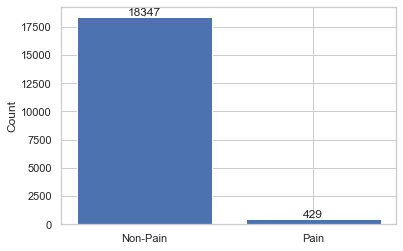

In [477]:
count_0 = merged_df["label"].value_counts()[0]
count_1 = merged_df["label"].value_counts()[1]
# print(merged_df["label"].value_counts())
x = [0, 1]  # x-coordinates for the bars
heights = [count_0, count_1]  # heights of the bars

for i, height in enumerate(heights):
    plt.text(x[i], height, str(height), ha='center', va='bottom')
    
plt.bar(x, heights)
plt.xticks(x, ['Non-Pain', 'Pain'])  # Set the x-tick labels
plt.xlabel('')
plt.ylabel('Count')

#plt.hist(merged_df['label'], bins=[0,0.5,1])
plt.savefig("0726results/class.png", dpi = 300)
plt.show()

## Remove Correlated Features

In [291]:
# orginal  
df_corr = merged_df.drop(["ClosenessCentrality", "AverageShortestPathLength","LFC_ipsc_old", "Stress", "Eccentricity",
                         "NeighborhoodConnectivity", "trans_tpm"], axis = 1)

In [295]:
df_corr = merged_df.drop(["ClosenessCentrality", "AverageShortestPathLength","LFC_ipsc_old", "BetweennessCentrality", "Eccentricity",
                         "NeighborhoodConnectivity", "trans_tpm"], axis = 1)

In [195]:
df_corr = merged_df.drop(["ClosenessCentrality","AverageShortestPathLength","BetweennessCentrality","Degree",
                         "NumberOfUndirectedEdges","Radiality",
                         "TopologicalCoefficient", "LFC_ipsc_old", "trans_tpm"], axis = 1)

In [289]:
df_corr = merged_df

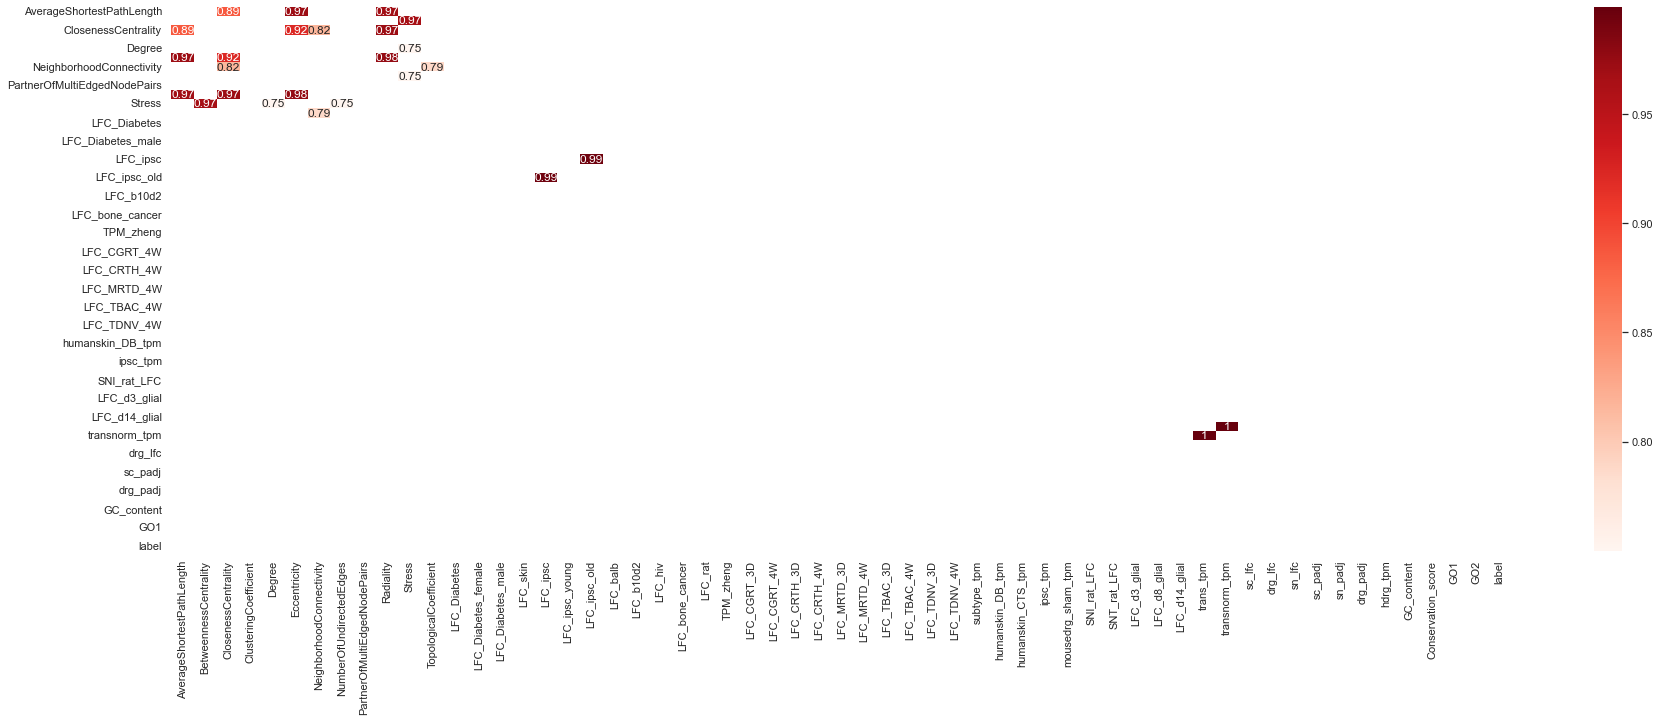

In [479]:
dfCorr = merged_df.corr()
filteredDf = dfCorr[((dfCorr >= .75) | (dfCorr <= -.75)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.savefig("0726results/feature_correlation.png", dpi = 300)
plt.show()

In [297]:
variances = merged_df.var()

# Sort the variances in descending order
sorted_variances = variances.sort_values(ascending=False)

# Print the ranked variables based on variance
sorted_variances[0:30]

Stress                       3.967275e+14
humanskin_CTS_tpm            6.649465e+05
Degree                       4.308364e+05
NumberOfUndirectedEdges      4.308364e+05
NeighborhoodConnectivity     2.803229e+05
subtype_tpm                  1.039907e+05
humanskin_DB_tpm             7.393760e+04
hdrg_tpm                     1.880792e+04
transnorm_tpm                1.733531e+04
trans_tpm                    1.697159e+04
mousedrg_sham_tpm            1.504093e+04
TPM_zheng                    1.173837e+04
ipsc_tpm                     9.975154e+03
chromosome_name              3.572341e+03
GC_content                   6.362551e+01
tissue                       2.516589e+01
cellular_comp                1.534473e+01
Eccentricity                 1.936477e+00
LFC_d3_glial                 1.633000e+00
LFC_d14_glial                1.473937e+00
LFC_CGRT_3D                  1.288706e+00
LFC_TDNV_3D                  9.067728e-01
LFC_ipsc                     8.967894e-01
LFC_ipsc_old                 8.873

In [298]:
# for corr > 0.75, remove feature with lower variance;  
df_all = df_corr
df_all.columns

Index(['symbol', 'ClusteringCoefficient', 'Degree', 'NumberOfUndirectedEdges',
       'PartnerOfMultiEdgedNodePairs', 'Radiality', 'Stress',
       'TopologicalCoefficient', 'LFC_Diabetes', 'LFC_Diabetes_female',
       'LFC_Diabetes_male', 'LFC_skin', 'LFC_ipsc', 'LFC_ipsc_young',
       'LFC_balb', 'LFC_b10d2', 'LFC_hiv', 'LFC_bone_cancer', 'LFC_rat',
       'TPM_zheng', 'LFC_CGRT_3D', 'LFC_CGRT_4W', 'LFC_CRTH_3D', 'LFC_CRTH_4W',
       'LFC_MRTD_3D', 'LFC_MRTD_4W', 'LFC_TBAC_3D', 'LFC_TBAC_4W',
       'LFC_TDNV_3D', 'LFC_TDNV_4W', 'subtype_tpm', 'humanskin_DB_tpm',
       'humanskin_CTS_tpm', 'ipsc_tpm', 'mousedrg_sham_tpm', 'SNI_rat_LFC',
       'SNT_rat_LFC', 'LFC_d3_glial', 'LFC_d8_glial', 'LFC_d14_glial',
       'transnorm_tpm', 'sc_lfc', 'drg_lfc', 'sn_lfc', 'sc_padj', 'sn_padj',
       'drg_padj', 'hdrg_tpm', 'cellular_comp', 'GC_content',
       'chromosome_name', 'Conservation_score', 'tissue', 'GO1', 'GO2',
       'label'],
      dtype='object')

## Feature Engineering

In [540]:
len(df_all.columns)

60

In [541]:
df_all.columns

Index(['symbol', 'ClusteringCoefficient', 'Degree', 'NumberOfUndirectedEdges',
       'PartnerOfMultiEdgedNodePairs', 'Radiality', 'Stress',
       'TopologicalCoefficient', 'LFC_Diabetes', 'LFC_Diabetes_female',
       'LFC_Diabetes_male', 'LFC_skin', 'LFC_ipsc', 'LFC_ipsc_young',
       'LFC_balb', 'LFC_b10d2', 'LFC_hiv', 'LFC_bone_cancer', 'LFC_rat',
       'TPM_zheng', 'LFC_CGRT_3D', 'LFC_CGRT_4W', 'LFC_CRTH_3D', 'LFC_CRTH_4W',
       'LFC_MRTD_3D', 'LFC_MRTD_4W', 'LFC_TBAC_3D', 'LFC_TBAC_4W',
       'LFC_TDNV_3D', 'LFC_TDNV_4W', 'subtype_tpm', 'humanskin_DB_tpm',
       'humanskin_CTS_tpm', 'ipsc_tpm', 'mousedrg_sham_tpm', 'SNI_rat_LFC',
       'SNT_rat_LFC', 'LFC_d3_glial', 'LFC_d8_glial', 'LFC_d14_glial',
       'transnorm_tpm', 'sc_lfc', 'drg_lfc', 'sn_lfc', 'sc_padj', 'sn_padj',
       'drg_padj', 'hdrg_tpm', 'cellular_comp', 'GC_content',
       'chromosome_name', 'Conservation_score', 'tissue', 'GO1', 'GO2',
       'label', 'LFC_drg_mouse', 'LFC_skin_human', 'LFC_drg_rat', '

In [299]:
## combined rna-seq data
df_all['LFC_drg_mouse'] = df_all[['LFC_CGRT_3D', 'LFC_CGRT_4W', 'LFC_CRTH_3D', 'LFC_CRTH_4W',
       'LFC_MRTD_3D', 'LFC_MRTD_4W', 'LFC_TBAC_3D', 'LFC_TDNV_3D',
       'LFC_TDNV_4W', 'LFC_TBAC_4W', 'LFC_balb', 'LFC_b10d2']].mean(axis=1).fillna(0)

In [300]:
df_all['LFC_skin_human'] = df_all[['LFC_Diabetes', 'LFC_Diabetes_female', 'LFC_Diabetes_male',
                                  'LFC_skin']].mean(axis=1).fillna(0)


In [301]:
df_all['LFC_drg_rat'] = df_all[["SNI_rat_LFC", "SNT_rat_LFC", "LFC_rat",'LFC_hiv','LFC_bone_cancer']].mean(axis=1).fillna(0)

In [302]:
df_all['glial_LFC'] = df_all[['LFC_d3_glial', 'LFC_d8_glial', 'LFC_d14_glial']].mean(axis=1).fillna(0)


In [303]:
df_all["LFC_ipsc"] = df_all[['LFC_ipsc_young', 
                             'LFC_ipsc']].mean(axis=1).fillna(0)

In [304]:
df_new = df_all.drop(['LFC_Diabetes', 'LFC_Diabetes_female', 'LFC_Diabetes_male', 'LFC_skin',
       'LFC_ipsc_young', 'LFC_balb', 'LFC_b10d2',
       'LFC_bone_cancer', 'LFC_hiv', 'LFC_d3_glial', 'LFC_d8_glial', 'LFC_d14_glial', 'LFC_CGRT_3D',
       'LFC_CGRT_4W', 'LFC_CRTH_3D', 'LFC_CRTH_4W', 'LFC_MRTD_3D',
       'LFC_MRTD_4W', 'LFC_TBAC_3D', 'LFC_TDNV_3D', 'LFC_TDNV_4W',
       'LFC_TBAC_4W', "label", "symbol", "SNI_rat_LFC", "SNT_rat_LFC"], axis = 1)

df_new["label"] = df_all["label"]
df_new.columns

Index(['ClusteringCoefficient', 'Degree', 'NumberOfUndirectedEdges',
       'PartnerOfMultiEdgedNodePairs', 'Radiality', 'Stress',
       'TopologicalCoefficient', 'LFC_ipsc', 'LFC_rat', 'TPM_zheng',
       'subtype_tpm', 'humanskin_DB_tpm', 'humanskin_CTS_tpm', 'ipsc_tpm',
       'mousedrg_sham_tpm', 'transnorm_tpm', 'sc_lfc', 'drg_lfc', 'sn_lfc',
       'sc_padj', 'sn_padj', 'drg_padj', 'hdrg_tpm', 'cellular_comp',
       'GC_content', 'chromosome_name', 'Conservation_score', 'tissue', 'GO1',
       'GO2', 'LFC_drg_mouse', 'LFC_skin_human', 'LFC_drg_rat', 'glial_LFC',
       'label'],
      dtype='object')

In [305]:
# check the missing values 
for col in df_new.columns:
    leng = len(df_new[(df_new[col] == 0) | (df_new[col].isnull())])
    print("{}: {}".format(col, leng))

ClusteringCoefficient: 2698
Degree: 2677
NumberOfUndirectedEdges: 2677
PartnerOfMultiEdgedNodePairs: 18776
Radiality: 2677
Stress: 2692
TopologicalCoefficient: 2686
LFC_ipsc: 4670
LFC_rat: 10547
TPM_zheng: 4263
subtype_tpm: 4781
humanskin_DB_tpm: 6450
humanskin_CTS_tpm: 3975
ipsc_tpm: 4098
mousedrg_sham_tpm: 2826
transnorm_tpm: 5147
sc_lfc: 15442
drg_lfc: 15243
sn_lfc: 16074
sc_padj: 15439
sn_padj: 16349
drg_padj: 15394
hdrg_tpm: 4015
cellular_comp: 2282
GC_content: 0
chromosome_name: 1861
Conservation_score: 3935
tissue: 2366
GO1: 4985
GO2: 4985
LFC_drg_mouse: 1903
LFC_skin_human: 1528
LFC_drg_rat: 8509
glial_LFC: 1279
label: 18347


In [306]:
df_new.fillna(value=0, inplace=True)
df_new.replace([np.inf, -np.inf], 0, inplace=True)

In [307]:
df_new.to_csv("0726results/df_new.csv", index = False)

In [309]:
# read df_new
df_new = pd.read_csv("0726results/df_new.csv")
display(df_new)

,ClusteringCoefficient,Degree,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,Stress,TopologicalCoefficient,LFC_ipsc,LFC_rat,TPM_zheng,...,chromosome_name,Conservation_score,tissue,GO1,GO2,LFC_drg_mouse,LFC_skin_human,LFC_drg_rat,glial_LFC,label
0,0.373843,429.0,429.0,0.0,0.999855,4075208.0,0.082700,-0.062275,0.520900,0.000000,...,10.0,0.106428,10.0,-0.023466,-0.012815,-0.109572,-0.144678,0.173633,0.304742,0
1,0.216980,123.0,123.0,0.0,0.999836,466640.0,0.067825,0.000000,-0.539398,0.001371,...,1.0,0.000000,10.0,0.000000,0.000000,-0.230671,0.000000,-0.179799,-0.224008,0
2,0.273258,539.0,539.0,0.0,0.999859,5137490.0,0.070230,-0.139697,0.000000,0.611935,...,3.0,0.065339,10.0,-0.046899,-0.119645,0.046869,0.085353,0.000000,-0.228876,0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.029208,0.890600,...,0.0,0.000000,2.0,-0.077509,0.059851,0.033237,0.022438,0.116268,-0.232236,0
4,0.179099,75.0,75.0,0.0,0.999834,402336.0,0.066489,0.601418,-0.934714,2.094083,...,14.0,0.070893,9.0,-0.076615,0.031807,0.276324,0.048037,-0.226939,-0.638723,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18771,0.444404,1129.0,1129.0,0.0,0.999871,7253058.0,0.121322,0.000000,0.000000,0.000000,...,2.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.222972,0.000000,0
18772,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,15.500455,...,2.0,0.000000,0.0,0.000000,0.000000,0.109883,0.060113,0.000000,0.000000,0
18773,0.445957,1141.0,1141.0,0.0,0.999871,6742698.0,0.120489,-0.032418,0.000000,0.000000,...,10.0,0.128468,13.0,0.866658,0.101534,0.000000,0.028734,0.000000,0.000000,0
18774,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.113954,0.000000,0.000000,...,20.0,0.053303,20.0,0.866658,0.101534,0.265149,-0.026955,0.000000,0.000000,0


## hyperparameter tuning before feature selection

In [310]:
df = df_new
X = df.values[:,:-1]
y = df.values[:,-1]
y = y.astype('int')

# scale the data - to a range -1, 1 
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# scale train and test sets separately 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Apply SMOTE oversampling to balance the classes in training data, paired to undersampling the majority
undersample = RandomUnderSampler()
X_trainr, y_trainr = undersample.fit_resample(X_train, y_train)

In [311]:
optuna.logging.set_verbosity(optuna.logging.CRITICAL)

def objective(trial):
    """Define the objective function"""
    metric_list = ['logloss', 'map']
    objective_list_reg = ['reg:squarederror', 'reg:tweedie', 'binary:logistic']
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 25),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 10, log=True),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'eval_metric': trial.suggest_categorical('eval_metric', metric_list),
        'objective':trial.suggest_categorical('objective', objective_list_reg),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }

    # Fit the model
    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(X_trainr, y_trainr)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    mcc = matthews_corrcoef(y_test, y_pred) 
    gm = geometric_mean_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    ba = balanced_accuracy_score(y_test, y_pred)
    return mcc+gm+ba+f

study = optuna.create_study(direction='maximize') 
study.optimize(objective, n_trials=200) 
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 200
Best trial:
  Value: 1.9212718009142744
  Params: 
    max_depth: 23
    learning_rate: 0.0191362706168057
    n_estimators: 720
    min_child_weight: 8
    gamma: 2.0523522405539425
    subsample: 0.44084158935821605
    colsample_bytree: 0.1653235573721306
    reg_alpha: 3.0497872451419696e-07
    reg_lambda: 1.2185781039190563e-07
    eval_metric: map
    objective: reg:tweedie
    random_state: 43


In [312]:
params = trial.params 
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_trainr, y_trainr)
y_pred = xgb_model.predict(X_test)
print(params)
print(matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
gm = geometric_mean_score(y_test,  y_pred)
print("The geometric mean score is {:.4f}".format(gm))

{'max_depth': 23, 'learning_rate': 0.0191362706168057, 'n_estimators': 720, 'min_child_weight': 8, 'gamma': 2.0523522405539425, 'subsample': 0.44084158935821605, 'colsample_bytree': 0.1653235573721306, 'reg_alpha': 3.0497872451419696e-07, 'reg_lambda': 1.2185781039190563e-07, 'eval_metric': 'map', 'objective': 'reg:tweedie', 'random_state': 43}
0.2105471368275299
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      5504
           1       0.09      0.74      0.16       129

    accuracy                           0.82      5633
   macro avg       0.54      0.78      0.53      5633
weighted avg       0.97      0.82      0.88      5633

The geometric mean score is 0.7768


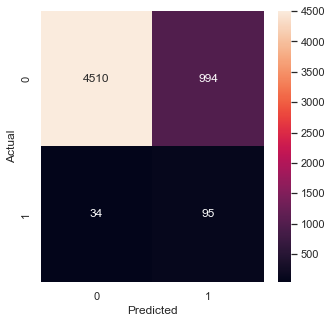

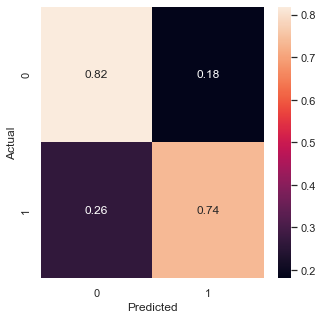

In [313]:
# plot 
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax  = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("0726results/XGB_hm.png")
plt.show()

norm_conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
fig1, ax1  = plt.subplots(figsize=(5,5))
sns.heatmap(norm_conf_mat, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("0726results/XGB_hm_norm.png")
plt.show()

In [314]:
## Save the model 
filename = '0726results/xgb_model.sav' #rename here
pickle.dump(xgb_model, open(filename, 'wb'))

In [65]:
## Save the model 
filename = 'models/xgb_model_0720_second.sav' #rename here
pickle.dump(xgb_model, open(filename, 'wb'))

In [42]:
## Save the model 
filename = 'models/xgb_model_mcc=0.20___20230718_first.sav' #rename here
pickle.dump(xgb_model, open(filename, 'wb'))

## Feature Selection

In [315]:
# xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_trainr, y_trainr)
y_pred = xgb_model.predict(X_test)

In [316]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap_interaction_values = explainer.shap_interaction_values(X_test[1000:,:])
# shap.summary_plot(shap_interaction_values, X_test[1000:,:])
feature_names = df.drop("label", axis = 1).columns
rf_resultX = pd.DataFrame(shap_values, columns = feature_names)
vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
ranked_features = shap_importance
print(ranked_features)

                        col_name  feature_importance_vals
28                           GO1                 0.443091
23                 cellular_comp                 0.262221
15                 transnorm_tpm                 0.153252
12             humanskin_CTS_tpm                 0.120321
1                         Degree                 0.117699
17                       drg_lfc                 0.117297
5                         Stress                 0.111909
27                        tissue                 0.111560
4                      Radiality                 0.101734
8                        LFC_rat                 0.098012
11              humanskin_DB_tpm                 0.095566
7                       LFC_ipsc                 0.093795
22                      hdrg_tpm                 0.085402
14             mousedrg_sham_tpm                 0.085177
24                    GC_content                 0.084045
33                     glial_LFC                 0.081648
2        Numbe

In [269]:
len(df_new.columns)

35

In [317]:
mccs = []
accs = []
num = []
gms = []

# top _ features, excluding 0 

for x in range(35, 9, -1):
    num.append(x)
    selected = ranked_features["col_name"][0:x]
    # generate new datasets containing only selected features 
    df = df_new[selected]
    
    X = df
    y = y
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    X_trainr, y_trainr = undersample.fit_resample(X_train, y_train)
    
    m = xgb_model     # this is the model after hyperparameter tuning 
    
    m.fit(X_trainr, y_trainr)
    
    y_pred = m.predict(X_test)
    mcc = matthews_corrcoef(y_test, y_pred)
    mccs.append(mcc)
    
    gm = geometric_mean_score(y_test, y_pred)
    gms.append(gm)
    
    acc = balanced_accuracy_score(y_test, y_pred)
    accs.append(acc)

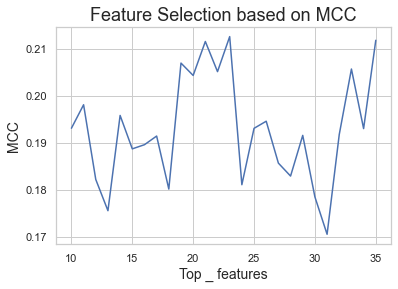

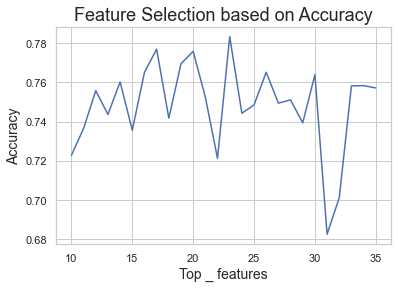

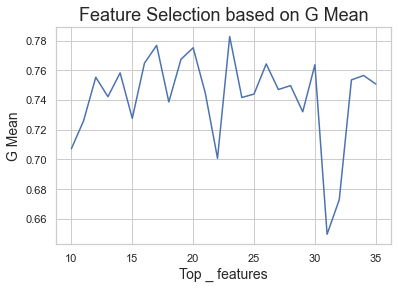

In [318]:
nums = [x for x in num]
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line plot
ax.plot(nums, mccs)
# Add labels and a title
ax.set_xlabel('Top _ features', fontsize = 14)
ax.set_ylabel('MCC', fontsize = 14)
ax.set_title('Feature Selection based on MCC', fontsize = 18)
plt.savefig("0726results/feature_select_mcc.png", dpi = 300)
plt.show()

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line plot
ax.plot(nums, accs)
# Add labels and a title
ax.set_xlabel('Top _ features', fontsize = 14)
ax.set_ylabel('Accuracy', fontsize = 14)
ax.set_title('Feature Selection based on Accuracy', fontsize = 18)
plt.savefig("0726results/feature_select_acc.png", dpi = 300, bbox_inches='tight')
plt.show()

# Create a figure and axis object
fig, ax = plt.subplots()
# Plot the data as a line plot
ax.plot(nums, gms)
# Add labels and a title
ax.set_xlabel('Top _ features', fontsize = 14)
ax.set_ylabel('G Mean', fontsize = 14)
ax.set_title('Feature Selection based on G Mean', fontsize = 18)
plt.savefig("0726results/feature_select_gm.png", dpi = 300, bbox_inches='tight')
plt.show()

In [319]:
# Find the index of the peak point of MCC and accuracy 
peak_mcc = np.argmax(mccs)
peak_acc = np.argmax(accs)

# Get the x-value of the peak point
peak_x = nums[peak_mcc]
print(peak_x)

peak_xa = nums[peak_acc]
print(nums[np.argmax(accs)])
print(nums[np.argmax(gms)])

23
23
23


In [320]:
df = df_new
selected = ranked_features["col_name"][0:23]
print(selected)
# generate new datasets containing only selected features 
new_df = df[selected]
new_df['label'] = df['label']
new_df.fillna(value=0, inplace=True)
new_df.replace([np.inf, -np.inf], 0, inplace=True)
display(new_df)

28                        GO1
23              cellular_comp
15              transnorm_tpm
12          humanskin_CTS_tpm
1                      Degree
17                    drg_lfc
5                      Stress
27                     tissue
4                   Radiality
8                     LFC_rat
11           humanskin_DB_tpm
7                    LFC_ipsc
22                   hdrg_tpm
14          mousedrg_sham_tpm
24                 GC_content
33                  glial_LFC
2     NumberOfUndirectedEdges
29                        GO2
0       ClusteringCoefficient
13                   ipsc_tpm
9                   TPM_zheng
10                subtype_tpm
31             LFC_skin_human
Name: col_name, dtype: object


,GO1,cellular_comp,transnorm_tpm,humanskin_CTS_tpm,Degree,drg_lfc,Stress,tissue,Radiality,LFC_rat,...,GC_content,glial_LFC,NumberOfUndirectedEdges,GO2,ClusteringCoefficient,ipsc_tpm,TPM_zheng,subtype_tpm,LFC_skin_human,label
0,-0.023466,5.0,0.000000,0.142382,429.0,0.0,4075208.0,10.0,0.999855,0.520900,...,55.80,0.304742,429.0,-0.012815,0.373843,1.486300,0.000000,0.000000,-0.144678,0
1,0.000000,9.0,0.000000,0.000000,123.0,0.0,466640.0,10.0,0.999836,-0.539398,...,36.24,-0.224008,123.0,0.000000,0.216980,0.000000,0.001371,0.000000,0.000000,0
2,-0.046899,5.0,31.553382,18.083504,539.0,0.0,5137490.0,10.0,0.999859,0.000000,...,37.18,-0.228876,539.0,-0.119645,0.273258,0.056818,0.611935,0.164119,0.085353,0
3,-0.077509,6.0,42.372699,0.039240,0.0,0.0,0.0,2.0,0.000000,0.029208,...,54.19,-0.232236,0.0,0.059851,0.000000,0.011567,0.890600,2.387711,0.022438,0
4,-0.076615,6.0,58.959880,4.351813,75.0,0.0,402336.0,9.0,0.999834,-0.934714,...,52.39,-0.638723,75.0,0.031807,0.179099,4.519576,2.094083,2.239608,0.048037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18771,0.000000,0.0,93.065364,0.000000,1129.0,0.0,7253058.0,0.0,0.999871,0.000000,...,36.65,0.000000,1129.0,0.000000,0.444404,0.000000,0.000000,0.000000,0.000000,0
18772,0.000000,0.0,0.000000,9.487378,0.0,0.0,0.0,0.0,0.000000,0.000000,...,61.54,0.000000,0.0,0.000000,0.000000,39.867190,15.500455,11.572085,0.060113,0
18773,0.866658,9.0,0.000000,0.000000,1141.0,0.0,6742698.0,13.0,0.999871,0.000000,...,40.84,0.000000,1141.0,0.101534,0.445957,0.000000,0.000000,1.416806,0.028734,0
18774,0.866658,9.0,9.152046,6.508497,0.0,0.0,0.0,20.0,0.000000,0.000000,...,50.86,0.000000,0.0,0.101534,0.000000,3.411392,0.000000,0.065019,-0.026955,0


## Hyperparameter Tuning after Feature Selection

In [321]:
X = new_df.values[:,:-1]
y = new_df.values[:,-1]
y = y.astype('int')

# X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# scale the data - to a range -1, 1 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
    
undersample = RandomUnderSampler()
X_trainr, y_trainr = undersample.fit_resample(X_train, y_train)

In [322]:
optuna.logging.set_verbosity(optuna.logging.CRITICAL)

def objective(trial):
    """Define the objective function"""
    metric_list = ['logloss', 'map']
    objective_list_reg = ['reg:squarederror', 'reg:tweedie', 'binary:logistic']
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 25),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 10, log=True),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'eval_metric': trial.suggest_categorical('eval_metric', metric_list),
        'objective':trial.suggest_categorical('objective', objective_list_reg),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }

    # Fit the model
    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(X_trainr, y_trainr)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    mcc = matthews_corrcoef(y_test, y_pred) 
    gm = geometric_mean_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    ba = balanced_accuracy_score(y_test, y_pred)
    
    return mcc+gm+f+ba

study = optuna.create_study(direction='maximize') 
study.optimize(objective, n_trials=100) 
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 1.9045596151933657
  Params: 
    max_depth: 14
    learning_rate: 0.017660227905205852
    n_estimators: 254
    min_child_weight: 8
    gamma: 0.002463259072130362
    subsample: 0.5630419576483153
    colsample_bytree: 0.19021400008680678
    reg_alpha: 3.1755675201129667e-06
    reg_lambda: 0.0015090936966426745
    eval_metric: map
    objective: reg:tweedie
    random_state: 962


In [502]:
#params = trial.params 
#xgbm = xgb.XGBClassifier(**params)
xgbm.fit(X_trainr, y_trainr)

y_pred = xgbm.predict(X_test)
#print(params)
print(matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print('The geometric mean is {}'.format(geometric_mean_score(y_test, y_pred)))

0.20737459996087093
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      5504
           1       0.09      0.72      0.16       129

    accuracy                           0.82      5633
   macro avg       0.54      0.77      0.53      5633
weighted avg       0.97      0.82      0.88      5633

The geometric mean is 0.7701239250434201


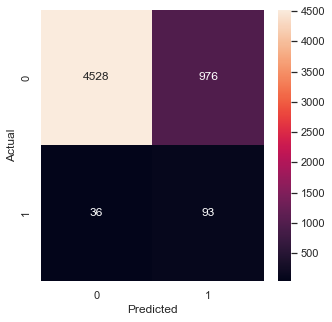

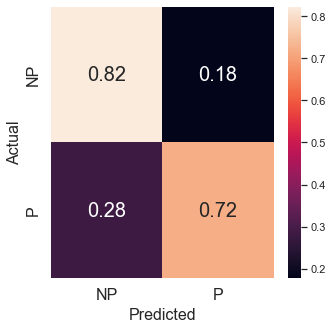

In [503]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax  = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("0726results/XGB.png")
plt.show()

norm_conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
fig1, ax1  = plt.subplots(figsize=(5,5))
sns.heatmap(norm_conf_mat, annot=True, annot_kws={"size": 20})

# Modify x-axis tick labels
ax1.set_xticklabels(['NP', 'P'], fontsize = 16)

# Modify y-axis tick labels
ax1.set_yticklabels(['NP', 'P'], fontsize = 16)

plt.ylabel('Actual', fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
plt.savefig("0726results/XGB_norm.png")
plt.show()

In [325]:
## Save the model 
filename = '0726results/xgbm.sav' #rename here
pickle.dump(xgbm, open(filename, 'wb'))

new_df.to_csv("0726results/new_df.csv", index = False)

In [326]:
train_X = pd.DataFrame(X_trainr)
train_Y = pd.DataFrame(y_trainr)
test_X = pd.DataFrame(X_test)
test_Y = pd.DataFrame(y_test)

train_X.to_csv("0726results/0726_trainX.csv", index = False)
train_Y.to_csv("0726results/0726_trainY.csv", index = False)
test_X.to_csv("0726results/0726_testX.csv", index = False)
test_Y.to_csv("0726results/0726_testY.csv", index = False)

## later, if want to read into metrics 
# # Read CSV file into a DataFrame
#df = pd.read_csv('matrix_data.csv')

# Convert DataFrame to matrix
#matrix = df.values

In [472]:
X_trainr = train_X.values
y_trainr = train_Y.values
X_test = test_X.values
y_test = test_Y.values 

In [327]:
print(new_df.columns)

Index(['GO1', 'cellular_comp', 'transnorm_tpm', 'humanskin_CTS_tpm', 'Degree',
       'drg_lfc', 'Stress', 'tissue', 'Radiality', 'LFC_rat',
       'humanskin_DB_tpm', 'LFC_ipsc', 'hdrg_tpm', 'mousedrg_sham_tpm',
       'GC_content', 'glial_LFC', 'NumberOfUndirectedEdges', 'GO2',
       'ClusteringCoefficient', 'ipsc_tpm', 'TPM_zheng', 'subtype_tpm',
       'LFC_skin_human', 'label'],
      dtype='object')


## Gradient Boosting 

In [328]:
from sklearn.ensemble import GradientBoostingClassifier as gb
optuna.logging.set_verbosity(optuna.logging.WARNING)
def objective(trial):
    """Define the objective function"""
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0, log=True),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0, log=True),
        'random_state': trial.suggest_int('random_state', 1, 1000)
        #'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0, log = True),
        # 'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5, log = True)
    }
 
    # Fit the model
    optuna_model = gb(**params)
    optuna_model.fit(X_trainr, y_trainr)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    mcc = matthews_corrcoef(y_test, y_pred) 
    gm = geometric_mean_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    ba = balanced_accuracy_score(y_test, y_pred)
    return mcc+gm+f+ba

study = optuna.create_study(direction='maximize') 
study.optimize(objective, n_trials=100) 
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 1.8119130534276782
  Params: 
    max_depth: 8
    learning_rate: 0.04380238014584094
    n_estimators: 565
    subsample: 0.04567114591857073
    max_features: 0.16640788008525254
    random_state: 819


In [500]:
#params = trial.params 
#gbm = gb(**params)
# gbm = pickle.load(open('models/gb_gm=0.77_0703_first.sav', "rb"))
gbm.fit(X_trainr, y_trainr)
y_pred = gbm.predict(X_test)
print(params)
print(matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print('The geometric mean is {}'.format(geometric_mean_score(y_test, y_pred)))

{'n_estimators': 268, 'max_depth': 16, 'min_samples_split': 2, 'random_state': 544, 'min_samples_leaf': 5, 'max_features': 18}
0.18346075850599203
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      5504
           1       0.08      0.68      0.14       129

    accuracy                           0.81      5633
   macro avg       0.53      0.75      0.52      5633
weighted avg       0.97      0.81      0.87      5633

The geometric mean is 0.7432391626235799


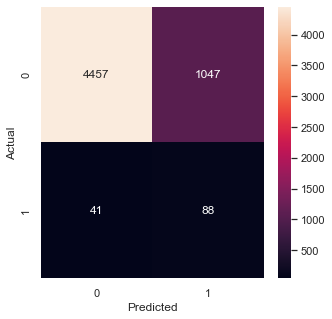

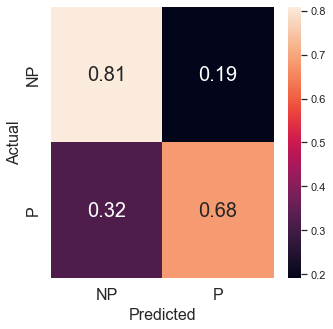

In [501]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax  = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("0726results/GB.png")
plt.show()

norm_conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
fig1, ax1  = plt.subplots(figsize=(5,5))
sns.heatmap(norm_conf_mat, annot=True, annot_kws={"size": 20})

# Modify x-axis tick labels
ax1.set_xticklabels(['NP', 'P'], fontsize = 16)

# Modify y-axis tick labels
ax1.set_yticklabels(['NP', 'P'], fontsize = 16)

plt.ylabel('Actual', fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
plt.savefig("0726results/GB_norm.png")
plt.show()

In [331]:
filename = '0726results/gb.sav' #rename here
pickle.dump(gbm, open(filename, 'wb'))

In [75]:
filename = 'models/gb_gm=0.77_0718_first.sav' #rename here
pickle.dump(gbm, open(filename, 'wb'))

In [183]:
filename = 'models/gb_0719_first.sav' #rename here
pickle.dump(gbm, open(filename, 'wb'))

## AdaBoost 

In [332]:
from sklearn.ensemble import AdaBoostClassifier as ada
# optuna.logging.set_verbosity(optuna.logging.WARNING)
def objective(trial):
    """Define the objective function"""

    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'base_estimator': DecisionTreeClassifier(max_depth=1),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }
 
    # Fit the model
    optuna_model = ada(**params)
    optuna_model.fit(X_trainr, y_trainr)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    mcc = matthews_corrcoef(y_test, y_pred) 
    gm = geometric_mean_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    ba = balanced_accuracy_score(y_test, y_pred)
    return (mcc + gm + f + ba)

study = optuna.create_study(direction='maximize') 
study.optimize(objective, n_trials=100) 
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 1.7568181042861246
  Params: 
    learning_rate: 0.007642872192817979
    n_estimators: 464
    random_state: 380


In [333]:
params = trial.params 
adab = ada(**params)
adab.fit(X_trainr, y_trainr)
y_pred = adab.predict(X_test)
print(params)
print(matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print('The geometric mean is {}'.format(geometric_mean_score(y_test, y_pred)))

{'learning_rate': 0.007642872192817979, 'n_estimators': 464, 'random_state': 380}
0.15750491014827625
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      5504
           1       0.06      0.83      0.10       129

    accuracy                           0.67      5633
   macro avg       0.52      0.75      0.45      5633
weighted avg       0.97      0.67      0.78      5633

The geometric mean is 0.7454085842976446


In [498]:
adab.fit(X_trainr, y_trainr)
y_pred = adab.predict(X_test)
print(params)
print(matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print('The geometric mean is {}'.format(geometric_mean_score(y_test, y_pred)))

{'n_estimators': 268, 'max_depth': 16, 'min_samples_split': 2, 'random_state': 544, 'min_samples_leaf': 5, 'max_features': 18}
0.15750491014827625
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      5504
           1       0.06      0.83      0.10       129

    accuracy                           0.67      5633
   macro avg       0.52      0.75      0.45      5633
weighted avg       0.97      0.67      0.78      5633

The geometric mean is 0.7454085842976446


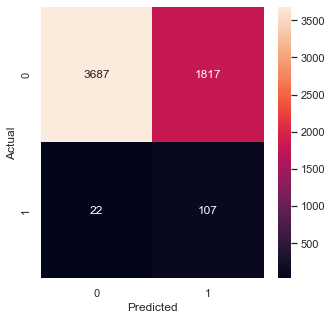

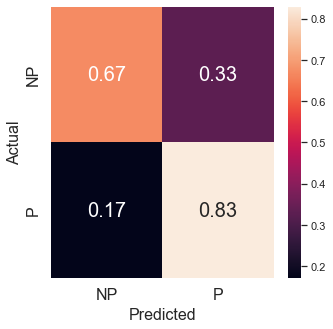

In [499]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax  = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("0726results/AB.png")
plt.show()

norm_conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
fig1, ax1  = plt.subplots(figsize=(5,5))
sns.heatmap(norm_conf_mat, annot=True, annot_kws={"size": 20})

# Modify x-axis tick labels
ax1.set_xticklabels(['NP', 'P'], fontsize = 16)

# Modify y-axis tick labels
ax1.set_yticklabels(['NP', 'P'], fontsize = 16)

plt.ylabel('Actual', fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
plt.savefig("0726results/AB_norm.png")
plt.show()

In [336]:
filename = '0726results/ab.sav' #rename here
pickle.dump(adab, open(filename, 'wb'))

In [49]:
filename = 'models/adab_gm=0.77_0703_first.sav' #rename here
pickle.dump(adab, open(filename, 'wb'))

In [80]:
filename = 'models/adab_gm=0.76_0718_first.sav' #rename here
pickle.dump(adab, open(filename, 'wb'))

## RandomForest 

In [337]:
def objective(trial):
    """Define the objective function"""

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 30), 
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'random_state': trial.suggest_int('random_state', 1, 1000),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [0.1, 0.5, 5]), 
        'max_features': trial.suggest_int('max_features', 1,X_train.shape[1]),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }
 
    # Fit the model
    optuna_model = RandomForestClassifier(**params)
    optuna_model.fit(X_trainr, y_trainr)
    
    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    mcc = matthews_corrcoef(y_test, y_pred) 
    gm = geometric_mean_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    ba = balanced_accuracy_score(y_test, y_pred)
    return (mcc + gm + f + ba)

study = optuna.create_study(direction='maximize') 
study.optimize(objective, n_trials=100) 
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 1.8132078769976636
  Params: 
    n_estimators: 268
    max_depth: 16
    min_samples_split: 2
    random_state: 544
    min_samples_leaf: 5
    max_features: 18


In [338]:
#params = trial.params 
#rf = RandomForestClassifier(**params)
rf.fit(X_trainr, y_trainr)
y_pred = rf.predict(X_test)
#print(params)
print(matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print('The geometric mean is {}'.format(geometric_mean_score(y_test, y_pred)))

0.17052236965914147
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      5504
           1       0.06      0.86      0.11       129

    accuracy                           0.68      5633
   macro avg       0.53      0.77      0.46      5633
weighted avg       0.97      0.68      0.79      5633

The geometric mean is 0.7635256182075854


In [496]:
#params = trial.params 
#rf = RandomForestClassifier(**params)
rf.fit(X_trainr, y_trainr)
y_pred = rf.predict(X_test)
#print(params)
print(matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print('The geometric mean is {}'.format(geometric_mean_score(y_test, y_pred)))

0.17052236965914147
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      5504
           1       0.06      0.86      0.11       129

    accuracy                           0.68      5633
   macro avg       0.53      0.77      0.46      5633
weighted avg       0.97      0.68      0.79      5633

The geometric mean is 0.7635256182075854


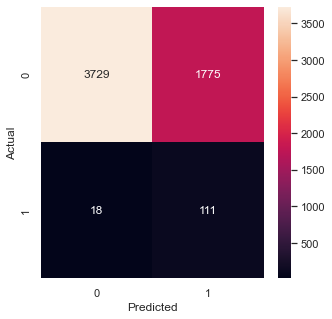

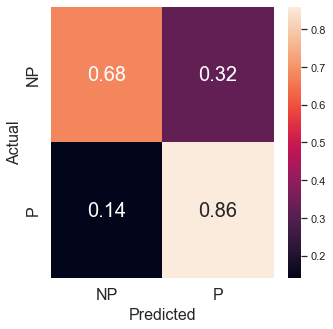

In [497]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax  = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("0726results/RF.png")
plt.show()

norm_conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
fig1, ax1  = plt.subplots(figsize=(5,5))
sns.heatmap(norm_conf_mat, annot=True, annot_kws={"size": 20})

# Modify x-axis tick labels
ax1.set_xticklabels(['NP', 'P'], fontsize = 16)

# Modify y-axis tick labels
ax1.set_yticklabels(['NP', 'P'], fontsize = 16)

plt.ylabel('Actual', fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
plt.savefig("0726results/RF_norm.png")
plt.show()

In [340]:
filename = '0726results/rf.sav' #rename here
pickle.dump(rf, open(filename, 'wb'))

In [462]:
rf = pickle.load(open('0726results/rf.sav', 'rb'))

## the voting & stacking classifier

{'n_estimators': 268, 'max_depth': 16, 'min_samples_split': 2, 'random_state': 544, 'min_samples_leaf': 5, 'max_features': 18}
0.17749633155343064
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      5504
           1       0.06      0.83      0.12       129

    accuracy                           0.72      5633
   macro avg       0.53      0.77      0.47      5633
weighted avg       0.97      0.72      0.81      5633

The geometric mean is 0.7693847265187922


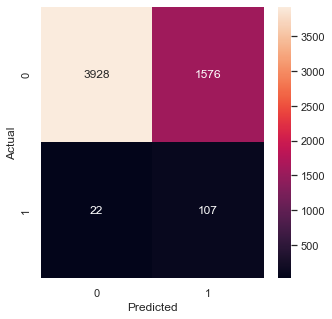

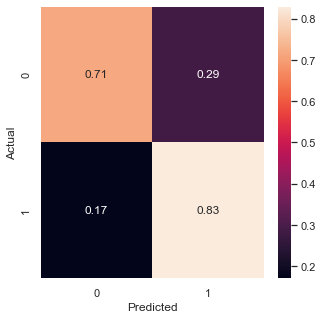

In [341]:
# include RF, XGB, GB, ADA 
estimators = [('xgb', xgbm),('gb', gbm), ('ada', adab), ('rf', rf)]

sclf = StackingClassifier(estimators=estimators) 

model = sclf
model.fit(X_trainr, y_trainr)
y_pred = model.predict(X_test)
print(params)
print(matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print('The geometric mean is {}'.format(geometric_mean_score(y_test, y_pred)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax  = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.savefig("0726results/stacking.png")
plt.show()

norm_conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
fig1, ax1  = plt.subplots(figsize=(5,5))
sns.heatmap(norm_conf_mat, annot=True, annot_kws={"size": 20})

# Modify x-axis tick labels
ax1.set_xticklabels(['NP', 'P'], fontsize = 16)

# Modify y-axis tick labels
ax1.set_yticklabels(['NP', 'P'], fontsize = 16)

plt.ylabel('Actual', fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
#plt.savefig("0726results/stacking_norm.png")
plt.show()

{'n_estimators': 268, 'max_depth': 16, 'min_samples_split': 2, 'random_state': 544, 'min_samples_leaf': 5, 'max_features': 18}
0.17749633155343064
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      5504
           1       0.06      0.83      0.12       129

    accuracy                           0.72      5633
   macro avg       0.53      0.77      0.47      5633
weighted avg       0.97      0.72      0.81      5633

The geometric mean is 0.7693847265187922


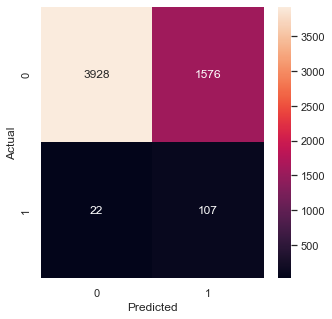

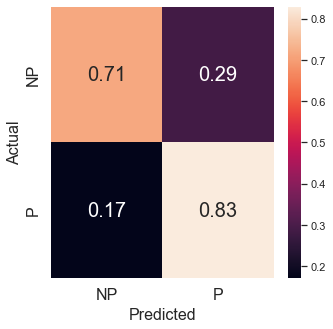

In [495]:
# include RF, XGB, GB, ADA 
estimators = [('xgb', xgbm),('gb', gbm), ('ada', adab), ('rf', rf)]

sclf = StackingClassifier(estimators=estimators) 

model = sclf
model.fit(X_trainr, y_trainr)
y_pred = model.predict(X_test)
print(params)
print(matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print('The geometric mean is {}'.format(geometric_mean_score(y_test, y_pred)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax  = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.savefig("0726results/stacking.png")
plt.show()

norm_conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
fig1, ax1  = plt.subplots(figsize=(5,5))
sns.heatmap(norm_conf_mat, annot=True, annot_kws={"size": 20})

# Modify x-axis tick labels
ax1.set_xticklabels(['NP', 'P'], fontsize = 16)

# Modify y-axis tick labels
ax1.set_yticklabels(['NP', 'P'], fontsize = 16)

plt.ylabel('Actual', fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
plt.savefig("0726results/stacking_norm.png")
plt.show()

In [343]:
filename = '0726results/sclf.sav' #rename here
pickle.dump(sclf, open(filename, 'wb'))

## The voting classifier

In [344]:
# voting classifier weight tuning 
from itertools import permutations
p = permutations([1,2,3,4])
weights = [list(i) for i in list(p)]
ensemble = VotingClassifier(estimators=estimators, voting='soft')

models = [ensemble]
#roc_dir = "images/roc15.png" # change this every time; last time is roc13
model_names = []

i = 0
scores_mcc = []
scores_gm = []
scores_roc = []

# try each weight 

for w in weights:
    m = VotingClassifier(estimators=estimators, voting='soft', weights = w)
    model_name = type(m).__name__
    
    m.fit(X_trainr,y_trainr)
     
    # fit model + predict on training data 
    probs = m.predict_proba(X_test)
    preds = probs[:,1]
    y_pred = m.predict(X_test)
    
    mcc = matthews_corrcoef(y_test, y_pred)
    gm = geometric_mean_score(y_test, y_pred)
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    scores_mcc.append(mcc)
    scores_roc.append(roc_auc)
    scores_gm.append(gm)

# select the weight with highest MCC
print(weights[np.argmax(scores_mcc)])
print(weights[np.argmax(scores_gm)])

[4, 2, 1, 3]
[4, 1, 3, 2]


{'n_estimators': 268, 'max_depth': 16, 'min_samples_split': 2, 'random_state': 544, 'min_samples_leaf': 5, 'max_features': 18}
0.204238176658723
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      5504
           1       0.08      0.78      0.14       129

    accuracy                           0.79      5633
   macro avg       0.54      0.79      0.51      5633
weighted avg       0.97      0.79      0.86      5633

The geometric mean is 0.7852739124860522


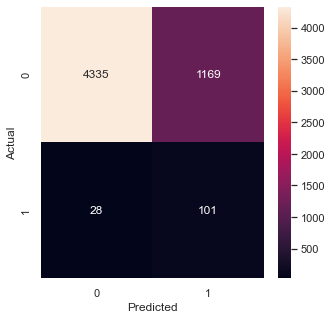

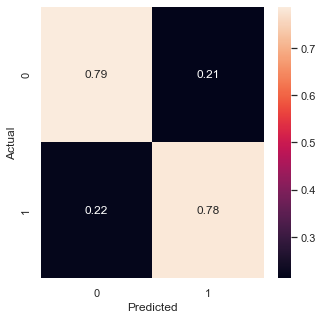

In [345]:
ensemble2 = VotingClassifier(estimators=estimators,voting='soft',weights = weights[np.argmax(scores_gm)])
model = ensemble2
model.fit(X_trainr, y_trainr)
y_pred = model.predict(X_test)
print(params)
print(matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print('The geometric mean is {}'.format(geometric_mean_score(y_test, y_pred)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax  = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("0726results/voting.png")
plt.show()

norm_conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
fig1, ax1  = plt.subplots(figsize=(5,5))
sns.heatmap(norm_conf_mat, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("0726results/voting_norm.png")
plt.show()

{'n_estimators': 268, 'max_depth': 16, 'min_samples_split': 2, 'random_state': 544, 'min_samples_leaf': 5, 'max_features': 18}
0.204238176658723
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      5504
           1       0.08      0.78      0.14       129

    accuracy                           0.79      5633
   macro avg       0.54      0.79      0.51      5633
weighted avg       0.97      0.79      0.86      5633

The geometric mean is 0.7852739124860522


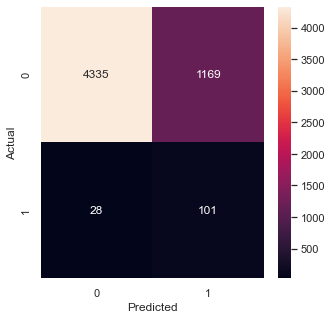

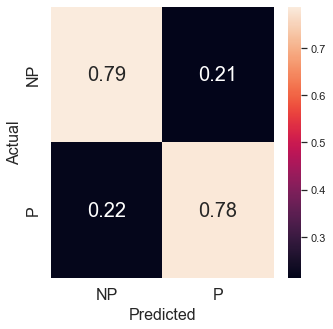

In [493]:
ensemble2 = VotingClassifier(estimators=estimators,voting='soft',weights = weights[np.argmax(scores_gm)])
model = ensemble2
model.fit(X_trainr, y_trainr)
y_pred = model.predict(X_test)
print(params)
print(matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print('The geometric mean is {}'.format(geometric_mean_score(y_test, y_pred)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax  = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.savefig("0726results/voting.png")
plt.show()

norm_conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
fig1, ax1  = plt.subplots(figsize=(5,5))
sns.heatmap(norm_conf_mat, annot=True, annot_kws={"size": 20})

# Modify x-axis tick labels
ax1.set_xticklabels(['NP', 'P'], fontsize = 16)

# Modify y-axis tick labels
ax1.set_yticklabels(['NP', 'P'], fontsize = 16)

plt.ylabel('Actual', fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
plt.savefig("0726results/voting_norm.png")
plt.show()

In [348]:
filename = '0726results/voting.sav' #rename here
pickle.dump(ensemble2, open(filename, 'wb'))

## roc/precision-recall curve

In [347]:
TRIAL_DIR = "0726results/predictions_"

models = [xgbm, gbm, adab, rf, sclf, ensemble2] 

# used to generate probs for whole dataset 
x = new_df.values[:,:-1]
x = scaler.fit_transform(x)

for m in models:
    model_name = type(m).__name__
    
    m.fit(X_trainr,y_trainr)

    # predict prob
    proba = m.predict_proba(x)
    probs = pd.DataFrame(proba)
    probs['symbol'] = data["symbol"]
    probs = probs.sort_values(by=1,ascending=False)
    
    # save to csvs 
    dirc = "".join([TRIAL_DIR, model_name, ".csv"])
    probs.to_csv(dirc, index=False)

XGBClassifier (AUC = 0.8512, MCC = 0.2074, , GM = 0.77)
GradientBoostingClassifier (AUC = 0.8152, MCC = 0.1835, , GM = 0.74)
AdaBoostClassifier (AUC = 0.8243, MCC = 0.1575, , GM = 0.75)
RandomForestClassifier (AUC = 0.8438, MCC = 0.1705, , GM = 0.76)
StackingClassifier (AUC = 0.8581, MCC = 0.1775, , GM = 0.77)
VotingClassifier (AUC = 0.8583, MCC = 0.2042, , GM = 0.79)


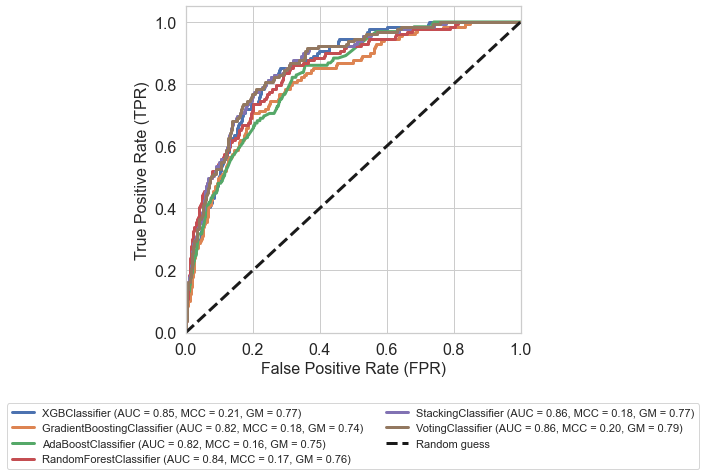

In [349]:
roc_dir = "0726results/roc_curve_.png"
TRIAL_DIR = "0726results/predictions_"

models = [xgbm, gbm, adab, rf, sclf, ensemble2] 

model_names = []

# used to generate probs
x = new_df.values[:,:-1]
x = scaler.fit_transform(x)

plt.figure(figsize=(6, 6))
i = 0
for m in models:
    model_name = type(m).__name__
    
    m.fit(X_trainr,y_trainr)

    # Make predictions
    y_pred = m.predict(X_test)
    preds  = m.predict_proba(X_test)[:,1]

    # Evaluate predictions
    mcc = matthews_corrcoef(y_test, y_pred) 
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    precision, recall, thresholds = precision_recall_curve(y_test, preds) 
    
    auc_score = auc(recall, precision)
    roc_auc = auc(fpr, tpr)
    gm = geometric_mean_score(y_test, y_pred)
    # plt.rcParams['axes.grid'] = False
    print("{} (AUC = {:.4f}, MCC = {:.4f}, , GM = {:.2f})".format(model_name, roc_auc, mcc, gm))
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f}, MCC = {:.2f}, GM = {:.2f})'.format(model_name, roc_auc, mcc, gm), linewidth=3)
    
    # predict prob
    proba = m.predict_proba(x)
    probs = pd.DataFrame(proba)
    probs['symbol'] = data['symbol']
    probs = probs.sort_values(by=1,ascending=False)
    
    # save to csvs 
    dirc = "".join([TRIAL_DIR, model_name, ".csv"])
    probs.to_csv(dirc, index=False)
    
plt.plot([0, 1], [0, 1], 'k--', lw=3, label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize = 16)
plt.ylabel('True Positive Rate (TPR)', fontsize = 16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.savefig(roc_dir, dpi = 300, bbox_inches='tight')
plt.show()  

XGBClassifier (AUC = 0.8512, MCC = 0.2074, , GM = 0.77)
GradientBoostingClassifier (AUC = 0.8152, MCC = 0.1835, , GM = 0.74)
AdaBoostClassifier (AUC = 0.8243, MCC = 0.1575, , GM = 0.75)
RandomForestClassifier (AUC = 0.8438, MCC = 0.1705, , GM = 0.76)
StackingClassifier (AUC = 0.8581, MCC = 0.1775, , GM = 0.77)
VotingClassifier (AUC = 0.8583, MCC = 0.2042, , GM = 0.79)


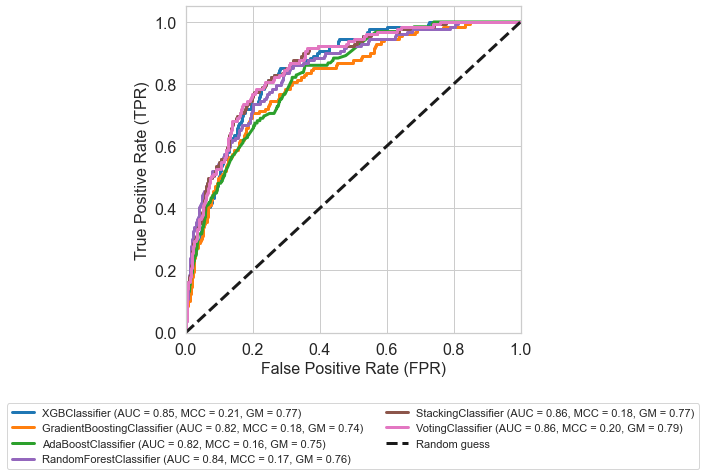

In [475]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2']
roc_dir = "0726results/roc_curve_.png"
TRIAL_DIR = "0726results/predictions_"
models = [xgbm, gbm, adab, rf, sclf, ensemble2] 

model_names = []

# used to generate probs
x = new_df.values[:,:-1]
x = scaler.fit_transform(x)

plt.figure(figsize=(6, 6))
i = 0
for m, color in zip(models, colors):
    model_name = type(m).__name__
    
    m.fit(X_trainr,y_trainr)

    # Make predictions
    y_pred = m.predict(X_test)
    preds  = m.predict_proba(X_test)[:,1]

    # Evaluate predictions
    mcc = matthews_corrcoef(y_test, y_pred) 
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    precision, recall, thresholds = precision_recall_curve(y_test, preds) 
    
    auc_score = auc(recall, precision)
    roc_auc = auc(fpr, tpr)
    gm = geometric_mean_score(y_test, y_pred)
    # plt.rcParams['axes.grid'] = False
    print("{} (AUC = {:.4f}, MCC = {:.4f}, , GM = {:.2f})".format(model_name, roc_auc, mcc, gm))
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f}, MCC = {:.2f}, GM = {:.2f})'.format(model_name, roc_auc, mcc, gm), linewidth=3,
            color=color)
    
    # predict prob
    proba = m.predict_proba(x)
    probs = pd.DataFrame(proba)
    probs['symbol'] = data['symbol']
    probs = probs.sort_values(by=1,ascending=False)
    
    # save to csvs 
    dirc = "".join([TRIAL_DIR, model_name, ".csv"])
    probs.to_csv(dirc, index=False)
    
    
plt.plot([0, 1], [0, 1], 'k--', lw=3, label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize = 16)
plt.ylabel('True Positive Rate (TPR)', fontsize = 16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.savefig(roc_dir, dpi = 300, bbox_inches='tight')
plt.show()  

XGBClassifier (AUC = 0.8512, MCC = 0.2074, , GM = 0.77)
GradientBoostingClassifier (AUC = 0.8152, MCC = 0.1835, , GM = 0.74)
AdaBoostClassifier (AUC = 0.8243, MCC = 0.1575, , GM = 0.75)
RandomForestClassifier (AUC = 0.8438, MCC = 0.1705, , GM = 0.76)
StackingClassifier (AUC = 0.8581, MCC = 0.1775, , GM = 0.77)
VotingClassifier (AUC = 0.8583, MCC = 0.2042, , GM = 0.79)


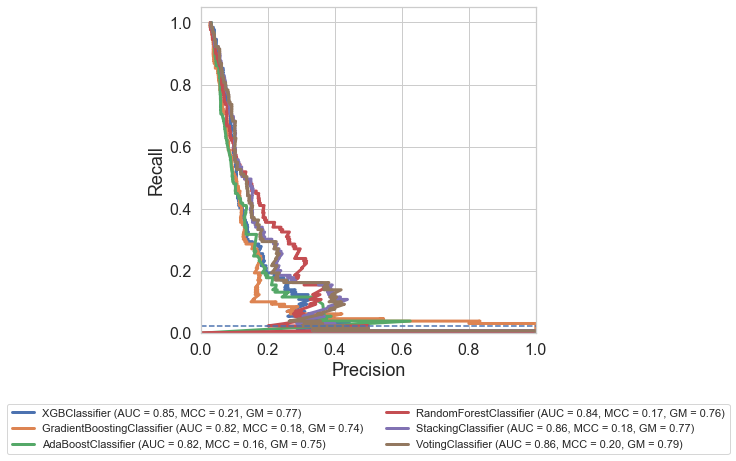

In [350]:
## Precision recall curve 
roc_dir = "0726results/precision_recall_curve.png"
models = [xgbm, gbm, adab, rf, sclf, ensemble2] 

model_names = []

plt.figure(figsize=(6, 6))
i = 0
for m in models:
    model_name = type(m).__name__
    
    m.fit(X_trainr,y_trainr)

    # Make predictions
    y_pred = m.predict(X_test)
    preds  = m.predict_proba(X_test)[:,1]

    # Evaluate predictions
    mcc = matthews_corrcoef(y_test, y_pred) 
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    precision, recall, thresholds = precision_recall_curve(y_test, preds) 
    
    auc_score = auc(recall, precision)
    roc_auc = auc(fpr, tpr)
    gm = geometric_mean_score(y_test, y_pred)
    # plt.rcParams['axes.grid'] = False
    print("{} (AUC = {:.4f}, MCC = {:.4f}, , GM = {:.2f})".format(model_name, roc_auc, mcc, gm))
    plt.plot(precision, recall, label='{} (AUC = {:.2f}, MCC = {:.2f}, GM = {:.2f})'.format(model_name, roc_auc, mcc, gm), linewidth=3)
    
plt.axhline(y=0.02284, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlabel('Precision', fontsize = 18)
plt.ylabel('Recall', fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.savefig(roc_dir, dpi = 300, bbox_inches='tight')
plt.show()  

## Feature exploration

28                        GO1
23              cellular_comp
15              transnorm_tpm
12          humanskin_CTS_tpm
1                      Degree
17                    drg_lfc
5                      Stress
27                     tissue
4                   Radiality
8                     LFC_rat
11           humanskin_DB_tpm
7                    LFC_ipsc
22                   hdrg_tpm
14          mousedrg_sham_tpm
24                 GC_content
33                  glial_LFC
2     NumberOfUndirectedEdges
29                        GO2
0       ClusteringCoefficient
13                   ipsc_tpm
9                   TPM_zheng
10                subtype_tpm
31             LFC_skin_human
Name: col_name, dtype: object


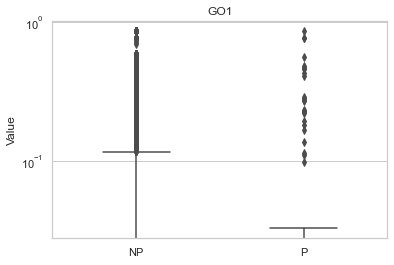

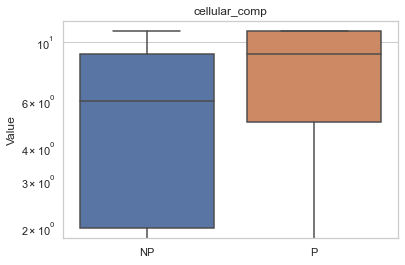

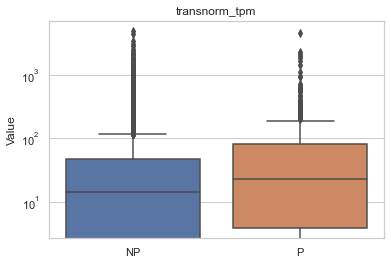

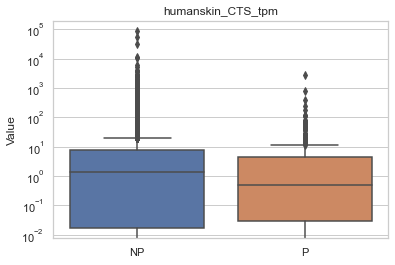

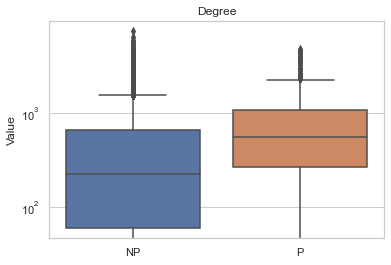

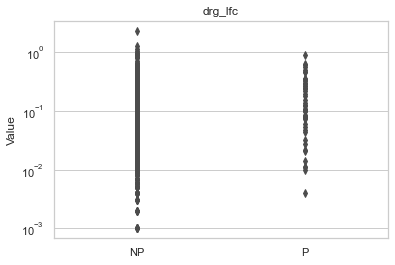

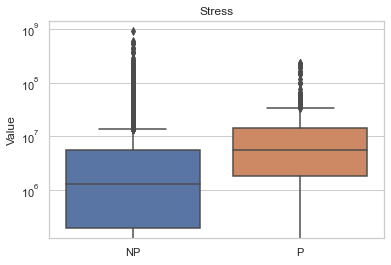

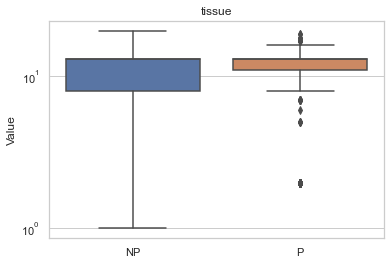

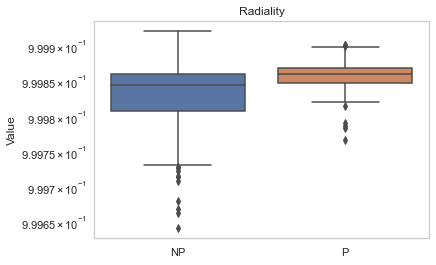

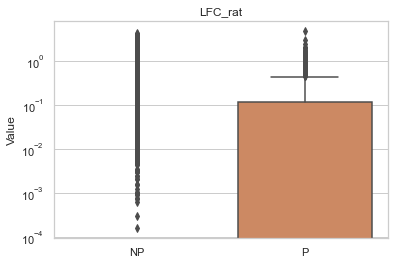

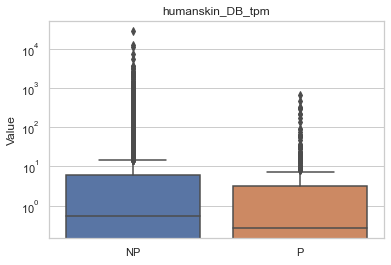

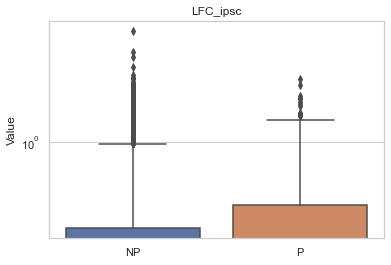

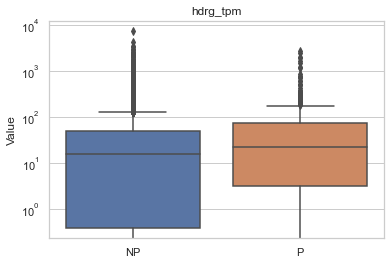

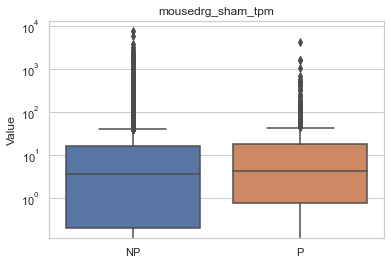

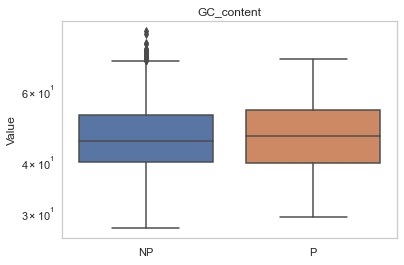

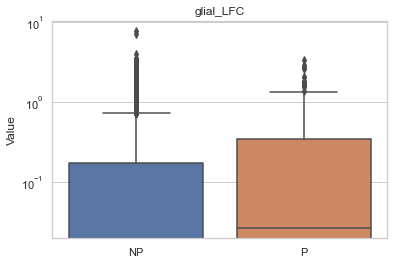

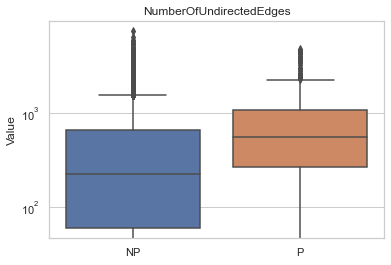

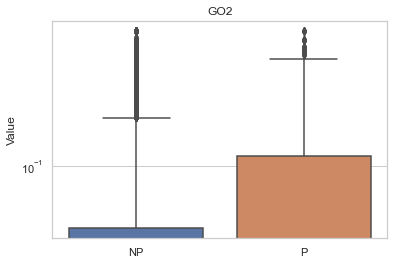

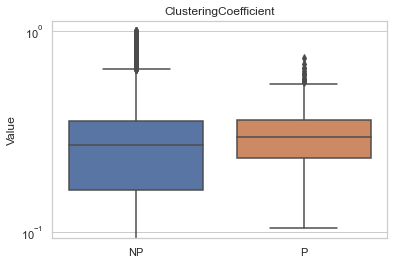

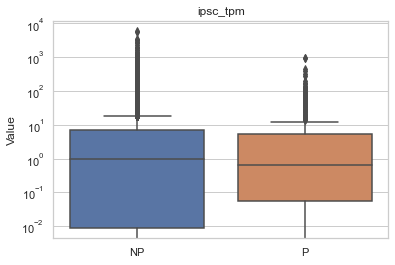

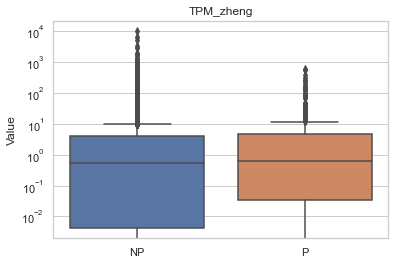

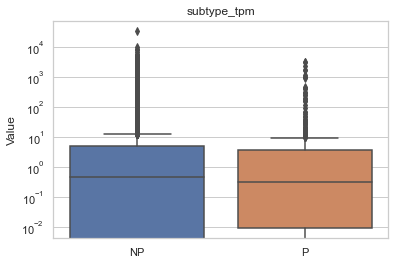

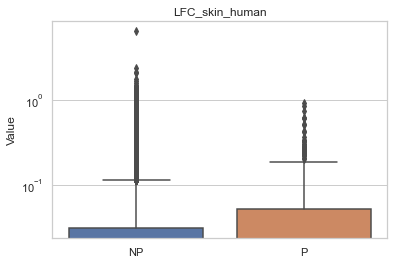

In [351]:
# top features + their distribution 
selected = ranked_features["col_name"][0:23]
print(selected)

# split the dataframe based on col1
df_NP   = df_all[df_all['label'] == 0]  
df_pain = df_all[df_all['label'] == 1]  

for fea in selected:

    # combine the datasets into a single DataFrame
    data = pd.DataFrame({'NP': df_NP[fea], 'P': df_pain[fea]})

    # create a boxplot with Seaborn
    sns.boxplot(data=data)

    # add title and axis labels
    plt.title(fea)
    plt.ylabel('Value')
    plt.yscale('log')
    
    plt.savefig("0726results/" + fea+".png", dpi = 300)
    # show the plot
    plt.show()

In [484]:
df_pgd = df_all

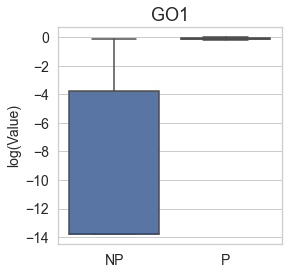

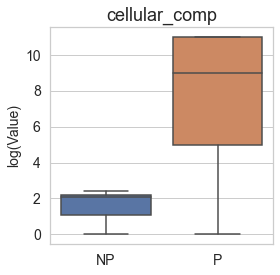

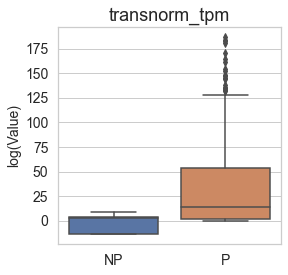

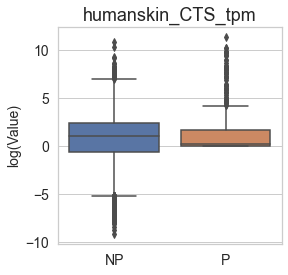

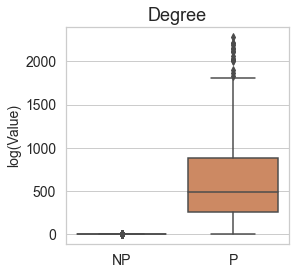

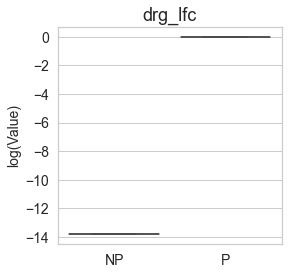

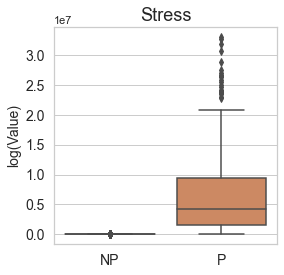

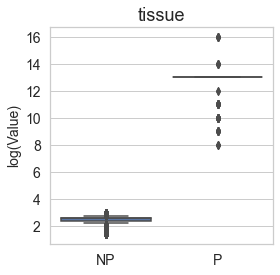

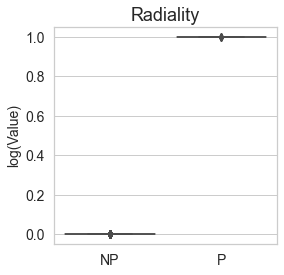

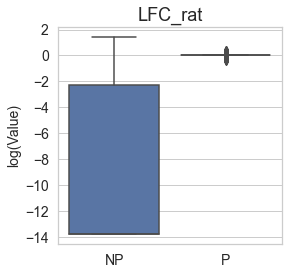

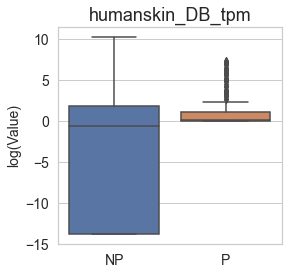

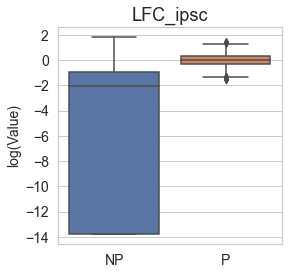

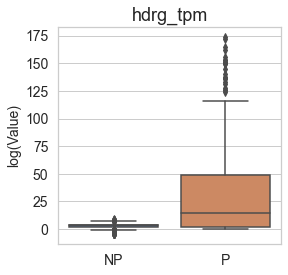

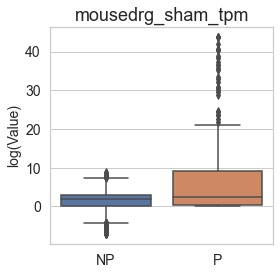

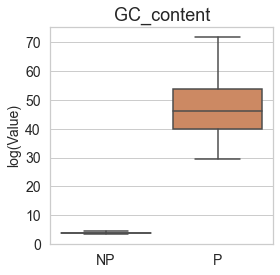

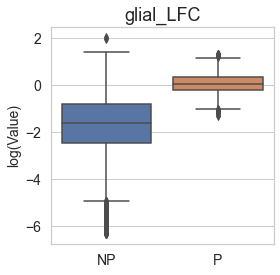

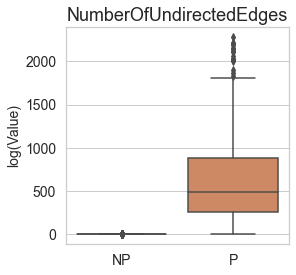

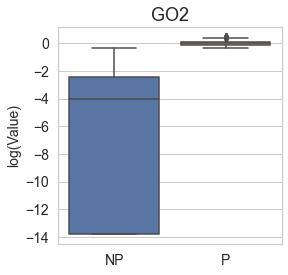

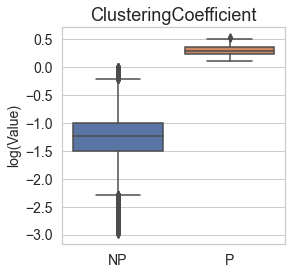

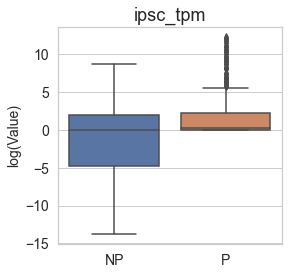

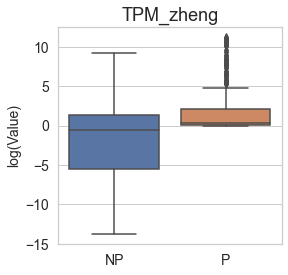

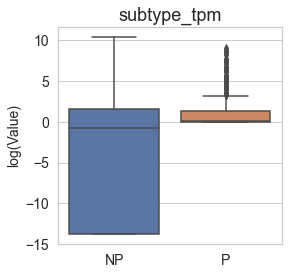

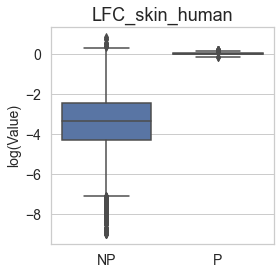

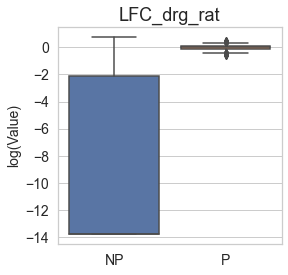

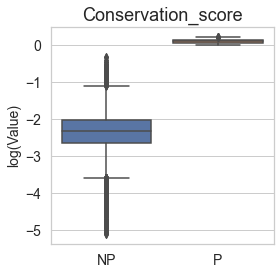

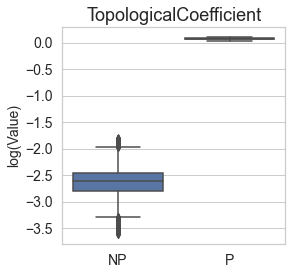

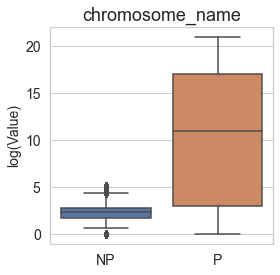

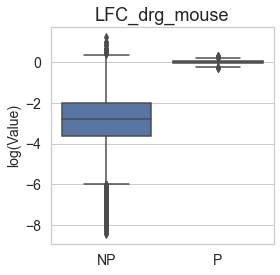

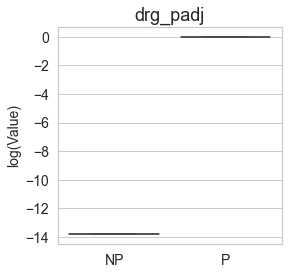

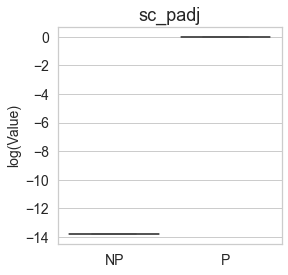

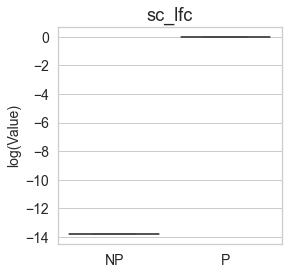

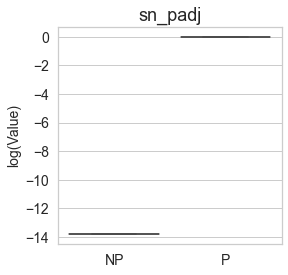

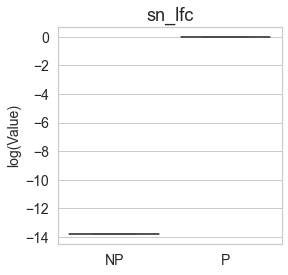

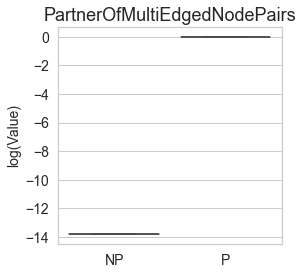

In [444]:
# top features + their distribution 
important_features = ranked_features["col_name"]

# important_features = ["LFC_drg"]
# split the dataframe based on col1
df_NP   = df_pgd[df_pgd['label'] == 0]  
df_pain = df_pgd[df_pgd['label'] == 1]  

for fea in important_features:
    data = df_pgd
    NP_no = df_pgd[df_pgd['label'] == 0][fea]
    pain_no = df_pgd[df_pgd['label'] == 1][fea]
    NP   = np.log(df_pgd[df_pgd['label'] == 0][fea]+0.000001)  
    pain = np.log(df_pgd[df_pgd['label'] == 1][fea] + 0.000001) 
    
    # NP = df_pgd[df_pgd['label'] == 0][fea]
    # pain = df_pgd[df_pgd['label'] == 1][fea]
    
    Q1 = NP.quantile(0.25)
    Q3 = NP.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the dataset
    NP_no_outliers = NP[(NP >= lower_bound) & (NP <= upper_bound)]

    pain = df_pgd[df_pgd['label'] == 1][fea]  
    
    Q1 = pain.quantile(0.25)
    Q3 = pain.quantile(0.75)
    IQR = Q3 - Q1
    
    pain_no_outliers = pain[(pain >= (Q1 - 1.5 * IQR)) & (pain <= (Q3 + 1.5 * IQR))]

    # combine the datasets into a single DataFrame
    # data = pd.DataFrame({'NP': NP_no_outliers, 'P': pain_no_outliers})
    data = pd.DataFrame({'NP': NP_no_outliers, 'P': pain_no_outliers})
    #data = pd.DataFrame({'NP': NP, 'P': pain})

    plt.figure(figsize=(4, 4))
    # create a boxplot with Seaborn
    sns.boxplot(data=data)

    # add title and axis labels
    plt.title(fea, fontsize = 18)
    plt.ylabel('log(Value)', fontsize = 14)
    # plt.ylabel('Value', fontsize = 14)
    plt.yticks(fontsize=14) 
    plt.xticks(fontsize=14) 
    plt.savefig("0726results/figures_fig/" + fea+".png", dpi = 300, bbox_inches='tight')
    # show the plot
    plt.show()

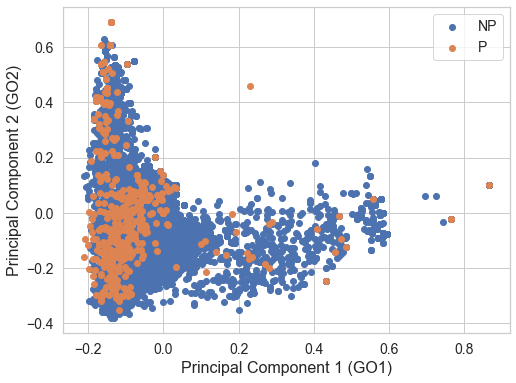

In [485]:
df_p = df_all[df_all["label"] == 1]
df_np = df_all[df_all["label"] == 0]

plt.figure(figsize=(8, 6))
plt.scatter(df_np["GO1"], df_np["GO2"], label='NP')
plt.scatter(df_p["GO1"], df_p["GO2"], label='P')

# plt.scatter(np.log(df_np["GO1"] + 0.000001), np.log(df_np["GO2"] + 0.000001), label='NP')
# plt.scatter(np.log(df_p["GO1"] + 0.000001), np.log(df_p["GO2"] + 0.000001), label='P')
plt.xlabel('Principal Component 1 (GO1)', fontsize = 16)
plt.ylabel('Principal Component 2 (GO2)', fontsize = 16)
    
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('0726results/figures_fig/pca.png', dpi=300)
plt.show()

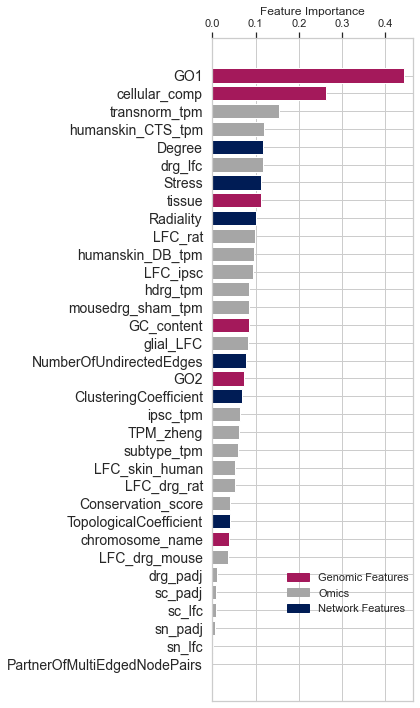

In [445]:
from matplotlib.patches import Patch
features = shap_importance["col_name"]
importance = shap_importance["feature_importance_vals"]

colors = []
for feature in features:
    if feature in ['AverageShortestPathLength', 'ClusteringCoefficient',
       'ClosenessCentrality', 'IsSingleNode', 'PartnerOfMultiEdgedNodePairs',
       'SelfLoops', 'Eccentricity', 'Stress', 'Degree',
       'BetweennessCentrality', 'NeighborhoodConnectivity',
       'NumberOfDirectedEdges', 'NumberOfUndirectedEdges', 'Radiality',
       'TopologicalCoefficient']:
        colors.append("#001c55ff")
    elif feature in ['cellular_comp', 'GC_content','percentage_gene_gc_content',
       'chromosome_name', "GO1", "GO2", "tissue"]:
        colors.append("#a4195bff")
        
    else:
        colors.append("#a6a6a6ff")
# Create a bar chart
plt.figure(figsize=(6, 10))
plt.barh(features[::-1], importance[::-1], color=colors[::-1])

# Customize the plot
#plt.xticks(rotation=45, ha='right', fontsize = 14)
plt.yticks(fontsize = 14)
# Improve layout
plt.tight_layout()
plt.xlabel('Feature Importance')

cmap = dict(zip(feature, set(colors)))

patches = [Patch(color=v, label=k) for k, v in cmap.items()]

# Create legend patches for each color
legend_patches = [Patch(color=color, label=feature) for feature, color in zip(features, colors)]

# Add legend
plt.legend(handles=legend_patches)

objects = ['Genomic Features',"Omics",'Network Features']

# add the legend
plt.legend(labels=objects, handles=patches, bbox_to_anchor=(1.0, 0.2), borderaxespad=0, frameon=False)
#plt.ylim(0, len(features) - 0.3)
# Set x-axis position to top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

fig = plt.gcf()
fig.set_size_inches(6, 10)  # Set the figure size (width, height)
plt.tight_layout()  # Adjust the layout of the plot

# Save the figure

plt.savefig('0726results/feature_importance.png', dpi=300)
# Display the plot
plt.show()

In [369]:
new_df.columns

Index(['GO1', 'cellular_comp', 'transnorm_tpm', 'humanskin_CTS_tpm', 'Degree',
       'drg_lfc', 'Stress', 'tissue', 'Radiality', 'LFC_rat',
       'humanskin_DB_tpm', 'LFC_ipsc', 'hdrg_tpm', 'mousedrg_sham_tpm',
       'GC_content', 'glial_LFC', 'NumberOfUndirectedEdges', 'GO2',
       'ClusteringCoefficient', 'ipsc_tpm', 'TPM_zheng', 'subtype_tpm',
       'LFC_skin_human', 'label'],
      dtype='object')

## Plotting Tissue, cellular_comp and chromosome name

In [385]:
mdf = merged_df
mdf['chromosome_name'] = data['chromosome_name']
mdf['cellular_comp'] = data['cellular_comp']
mdf['tissue'] = data['tissue']
display(mdf)

,symbol,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,NeighborhoodConnectivity,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,...,drg_padj,hdrg_tpm,cellular_comp,GC_content,chromosome_name,Conservation_score,tissue,GO1,GO2,label
0,A1BG,2.097180,0.000032,0.476831,0.373843,429.0,4.0,1328.407925,429.0,0.0,...,0.0,12.1,compartment..extracellular,55.80,19,0.106428,tissue..liver,-0.023466,-0.012815,0
1,A1CF,2.238160,0.000006,0.446795,0.216980,123.0,4.0,935.861789,123.0,0.0,...,0.0,0.1,compartment..nucleus,36.24,10,0.000000,tissue..liver,0.000000,0.000000,0
2,A2M,2.064604,0.000048,0.484354,0.273258,539.0,4.0,1162.098330,539.0,0.0,...,0.0,758.0,compartment..extracellular,37.18,12,0.065339,tissue..liver,-0.046899,-0.119645,0
3,A3GALT2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,compartment..golgi.apparatus,54.19,1,0.000000,tissue..blood,-0.077509,0.059851,0
4,A4GALT,2.255571,0.000005,0.443347,0.179099,75.0,4.0,899.440000,75.0,0.0,...,0.0,60.1,compartment..golgi.apparatus,52.39,22,0.070893,tissue..kidney,-0.076615,0.031807,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18771,ZFP91-CNTF,1.973994,0.000050,0.506587,0.444404,1129.0,4.0,2136.724535,1129.0,0.0,...,0.0,0.0,NaN,36.65,11,0.000000,NaN,0.000000,0.000000,0
18772,ZFTA,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,NaN,61.54,11,0.000000,NaN,0.000000,0.000000,0
18773,ZNF582,1.972735,0.000028,0.506911,0.445957,1141.0,4.0,2123.378615,1141.0,0.0,...,0.0,0.0,compartment..nucleus,40.84,19,0.128468,tissue..nervous.system,0.866658,0.101534,0
18774,ZNF7,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,32.5,compartment..nucleus,50.86,8,0.053303,tissue..urine,0.866658,0.101534,0


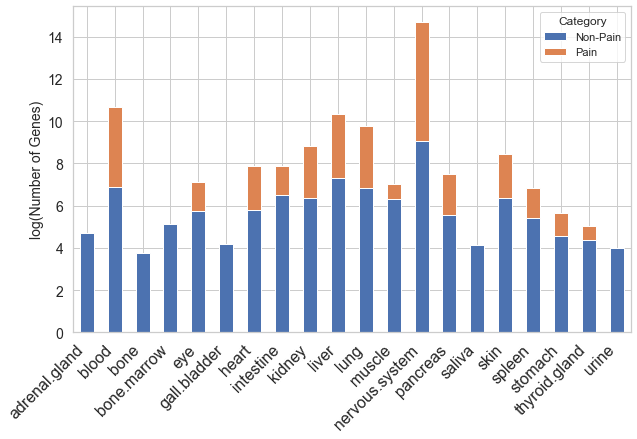

In [536]:
# Group the data by tissue and gene category and calculate the count
mdf['tissue'] = mdf['tissue'].str.replace('tissue\.\.', '', regex=True)

grouped_data = np.log(mdf.groupby(['tissue', 'label']).size().unstack(fill_value=0))

# Create a stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('')
plt.ylabel('log(Number of Genes)', fontsize = 14)
plt.xticks(fontsize=16, ha='right',rotation=45)
plt.yticks(fontsize=14)

# Show the legend
plt.legend(title='Category', loc='upper right', labels=['Non-Pain', 'Pain'])
plt.savefig("0726results/figures_fig/tissue.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

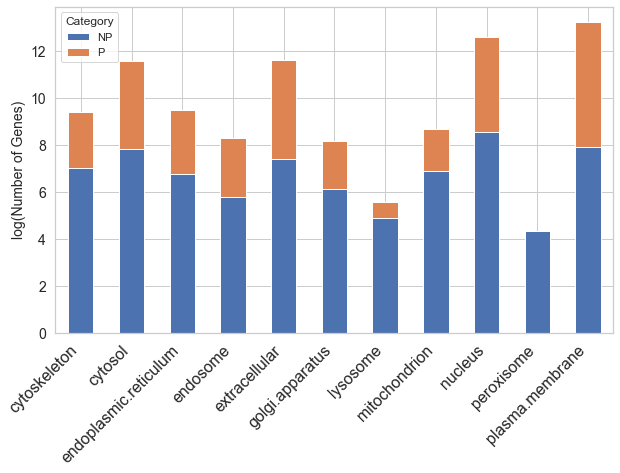

In [538]:
# Group the data by tissue and gene category and calculate the count
mdf['cellular_comp'] = mdf['cellular_comp'].str.replace('compartment\.\.', '', regex=True)

grouped_data = np.log(mdf.groupby(['cellular_comp', 'label']).size().unstack(fill_value=0))
# Create a stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('')
plt.ylabel('log(Number of Genes)', fontsize = 14)

plt.xticks(fontsize=16, ha='right',rotation=45)
plt.yticks(fontsize=14)

# Show the legend
plt.legend(title='Category', loc='upper left', labels=['NP', 'P'])
plt.savefig("0726results/figures_fig/cellular_comp.png", dpi=400, bbox_inches='tight')
# Show the plot
plt.show()

In [539]:
new_df.columns

Index(['GO1', 'cellular_comp', 'transnorm_tpm', 'humanskin_CTS_tpm', 'Degree',
       'drg_lfc', 'Stress', 'tissue', 'Radiality', 'LFC_rat',
       'humanskin_DB_tpm', 'LFC_ipsc', 'hdrg_tpm', 'mousedrg_sham_tpm',
       'GC_content', 'glial_LFC', 'NumberOfUndirectedEdges', 'GO2',
       'ClusteringCoefficient', 'ipsc_tpm', 'TPM_zheng', 'subtype_tpm',
       'LFC_skin_human', 'label'],
      dtype='object')

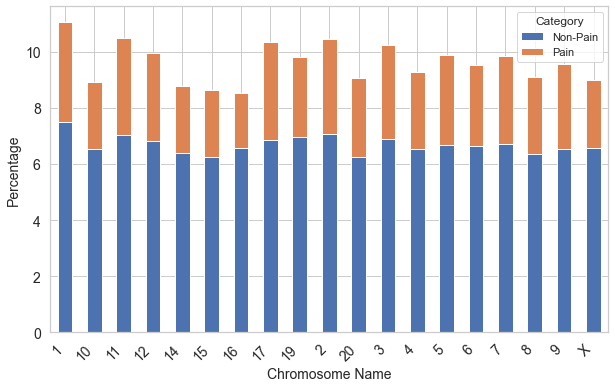

In [534]:
#chromosome_name
# Group the data by tissue and gene category and calculate the count
grouped_data = mdf.groupby(['chromosome_name', 'label']).size().unstack(fill_value=0)

chromosomes_with_500_genes = grouped_data.sum(axis=1)[grouped_data.sum(axis=1) > 500]

# Filter the data to include only chromosomes with more than 500 genes
grouped_data_filtered = np.log(grouped_data.loc[chromosomes_with_500_genes.index])

grouped_data_percent = grouped_data_filtered.div(grouped_data_filtered.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
ax = grouped_data_filtered.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Chromosome Name', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)

plt.xticks(fontsize=14, ha='right',rotation=45)
plt.yticks(fontsize=14)

# Show the legend
plt.legend(title='Category', loc='upper right', labels=['Non-Pain', 'Pain'])
plt.savefig("0726results/chromosome_name.png", dpi=300)
# Show the plot
plt.show()

## Performance

In [355]:
from collections import defaultdict

# repeat 10 times for each model, then get a group of mcc scores, plot them 
X = new_df.values[:,:-1]
y = new_df.values[:,-1]
y = y.astype('int')

model_results = defaultdict(list)
predicted_scores = defaultdict(list)
    
# repeat 10 times 
for k in range(10):
    
    # train/test split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    # Apply SMOTE oversampling to balance the classes in training data, paired to undersampling the majority
    X_trainr, y_trainr = undersample.fit_resample(X_train, y_train)

    i = 0
    for m in models:
        model_name = type(m).__name__

        m.fit(X_trainr,y_trainr)

        # fit model + predict on test data  
        probs = m.predict_proba(X_test)
        preds = probs[:,1]
        y_pred = m.predict(X_test)

        mcc = matthews_corrcoef(y_test, y_pred)
        accuracy = balanced_accuracy_score(y_test, y_pred)
        gm = geometric_mean_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        model_results[model_name].append([mcc, accuracy, gm, f1])
 
        i = i+1

In [518]:
model_results.keys()

dict_keys(['XGBClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'StackingClassifier', 'VotingClassifier', 0])

In [524]:
model_results

defaultdict(list,
            {'XGBClassifier': [[0.17879396375431278,
               0.7370700096899225,
               0.7329146957422138,
               0.13809910641754672],
              [0.20585186748301065,
               0.7604166666666667,
               0.7563802291298792,
               0.15927601809954753],
              [0.19578027628496728,
               0.7331031976744186,
               0.7217619920546446,
               0.1609907120743034],
              [0.19348556903174427,
               0.7487584786821706,
               0.7442447136516656,
               0.150087260034904],
              [0.2257196155252141,
               0.7640503875968991,
               0.7567823253826279,
               0.18201284796573877],
              [0.17521647472418153,
               0.7416727228682171,
               0.739865082480598,
               0.13136531365313653],
              [0.20039465459004335,
               0.7571463178294573,
               0.753424966228751,
       

In [523]:
result_df = pd.DataFrame(model_results['VotingClassifier'])
display(result_df)
result_df.to_csv("~/Desktop/result.csv")

,0,1,2,3
0,0.161144,0.733164,0.732639,0.118490
1,0.183612,0.762052,0.761985,0.131081
2,0.180623,0.745761,0.743667,0.135878
3,0.174059,0.761265,0.760695,0.119508
4,0.189807,0.763475,0.762996,0.137981
5,0.165625,0.747487,0.747387,0.116390
6,0.188415,0.774346,0.774173,0.130518
7,0.180256,0.768593,0.768012,0.123353
8,0.193583,0.771742,0.771648,0.138320
9,0.169789,0.758418,0.757361,0.115600


In [525]:
model_names = list(model_results.keys())
avg_mccs = []
avg_accs = []
avg_gms = []
avg_f1s = []

scores = []
errors = []
for name in model_names: 
    sublists = model_results[name]
    
    avg_mcc = np.median([sublist[0] for sublist in sublists])
    avg_mccs.append(avg_mcc)
    avg_acc = np.median([sublist[1] for sublist in sublists])
    avg_accs.append(avg_acc)
    avg_gm = np.median([sublist[2] for sublist in sublists])
    avg_gms.append(avg_gm)
    avg_f1 = np.median([sublist[3] for sublist in sublists])
    avg_f1s.append(avg_f1)
    scores.append([avg_mcc, avg_acc, avg_gm, avg_f1])
    mccs = [sublist[0] for sublist in sublists]
    accs = [sublist[1] for sublist in sublists]
    gms = [sublist[2] for sublist in sublists]
    f1s = [sublist[3] for sublist in sublists]
    err = [np.std(mccs), np.std(accs), np.std(gms), np.std(f1s)]

    errors.append(err)

In [526]:
scores

[[0.20088244025464574,
  0.758781492248062,
  0.7549025976793151,
  0.15386200071076728],
 [0.13390360651751462,
  0.704124273255814,
  0.6982194166202873,
  0.09959402090091307],
 [0.1479794527309387,
  0.7313620397286822,
  0.7304410433622734,
  0.10031240729414263],
 [0.14563780998996023,
  0.7365703730620154,
  0.7285117964981793,
  0.09510265195910744],
 [0.15668594586012954,
  0.7512566618217055,
  0.7444683832796433,
  0.10245717033778057],
 [0.1804394992123591,
  0.7616581879844961,
  0.7613400257130407,
  0.12693576378912041],
 [nan, nan, nan, nan]]

In [508]:
model_names = list(model_results.keys())
model_names

['XGBClassifier',
 'GradientBoostingClassifier',
 'AdaBoostClassifier',
 'RandomForestClassifier',
 'StackingClassifier',
 'VotingClassifier']

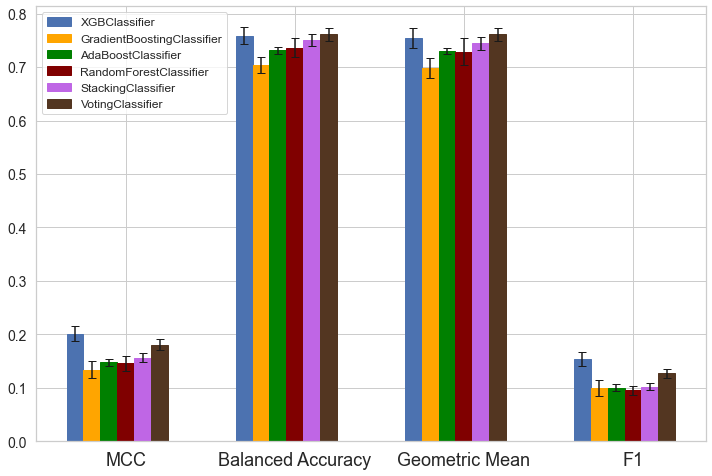

In [527]:
mn = model_names
rf = []
barWidth = 0.10
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
rf = scores[0]
gb = scores[1]
ab = scores[2]
xgb = scores[3]
sc = scores[4]
vc = scores[5]
 
# Set position of bar on X axis
br1 = np.arange(len(rf))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
 
# Make the plot
plt.bar(br1, rf, color ='b', width = barWidth,
        edgecolor ='b', label =mn[0],yerr = errors[0],capsize=4)
plt.bar(br2, gb, color ='orange', width = barWidth,
        edgecolor ='orange', label =mn[1], yerr = errors[1],capsize=4)
plt.bar(br3, ab, color ='green', width = barWidth,
        edgecolor ='green', label =mn[2], yerr = errors[2],capsize=4)
plt.bar(br4, xgb, color ='#800000', width = barWidth,
        edgecolor ='#800000', label =mn[3], yerr = errors[3],capsize=4)
plt.bar(br5, sc, color ='#bf66e5', width = barWidth,
        edgecolor ='#bf66e5', label =mn[4], yerr = errors[4],capsize=4)
plt.bar(br6, vc, color ='#533621', width = barWidth,
        edgecolor ='#533621', label =mn[5], yerr = errors[5],capsize=4)
 
# Adding Xticks
plt.xticks([r + barWidth*3 for r in range(len(rf))],
        ["MCC", "Balanced Accuracy", "Geometric Mean", "F1"], fontsize = 18)
plt.yticks(fontsize = 14)
 
plt.legend(fontsize = 12,loc='upper left')
#plt.savefig('0726results/model_scores.png', dpi=300)
plt.show()

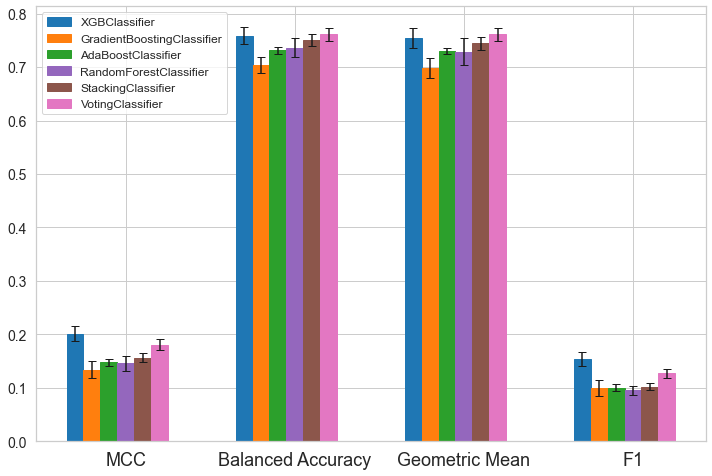

In [528]:
mn = model_names
rf = []
barWidth = 0.10
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
rf = scores[0]
gb = scores[1]
ab = scores[2]
xgb = scores[3]
sc = scores[4]
vc = scores[5]
 
# Set position of bar on X axis
br1 = np.arange(len(rf))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
 
# Make the plot
plt.bar(br1, rf, color ='#1f77b4', width = barWidth,
        edgecolor ='#1f77b4', label =mn[0],yerr = errors[0],capsize=4)
plt.bar(br2, gb, color ='#ff7f0e', width = barWidth,
        edgecolor ='#ff7f0e', label =mn[1], yerr = errors[1],capsize=4)
plt.bar(br3, ab, color ='#2ca02c', width = barWidth,
        edgecolor ='#2ca02c', label =mn[2], yerr = errors[2],capsize=4)
plt.bar(br4, xgb, color ='#9467bd', width = barWidth,
        edgecolor ='#9467bd', label =mn[3], yerr = errors[3],capsize=4)
plt.bar(br5, sc, color ='#8c564b', width = barWidth,
        edgecolor ='#8c564b', label =mn[4], yerr = errors[4],capsize=4)
plt.bar(br6, vc, color ='#e377c2', width = barWidth,
        edgecolor ='#e377c2', label =mn[5], yerr = errors[5],capsize=4)
 
# Adding Xticks
plt.xticks([r + barWidth*3 for r in range(len(rf))],
        ["MCC", "Balanced Accuracy", "Geometric Mean", "F1"], fontsize = 18)
plt.yticks(fontsize = 14)
 
plt.legend(fontsize = 12,loc='upper left')
plt.savefig('0726results/model_scores.png', dpi=300)
plt.show()

## Evaluating the Stability 

### Similarity metrics 

In [361]:
# top 900 of each method 
xgbd = pd.read_csv("0726results/predictions_XGBClassifier.csv") 
gbd = pd.read_csv("0726results/predictions_GradientBoostingClassifier.csv")
rfd = pd.read_csv("0726results/predictions_RandomForestClassifier.csv")
abd = pd.read_csv("0726results/predictions_AdaBoostClassifier.csv")
scd = pd.read_csv("0726results/predictions_StackingClassifier.csv")
vcd = pd.read_csv("0726results/predictions_VotingClassifier.csv")


# evaluate the top 1500 genes - how similar they are 
n = 1500

# Example gene sets
gene_sets = [
    set(xgbd["symbol"][1:n]),
    set(gbd["symbol"][1:n]),
    set(rfd["symbol"][1:n]),
    set(abd["symbol"][1:n]),
    set(scd["symbol"][1:n]),
    set(vcd["symbol"][1:n])
]


# Calculate the similarity matrix
num_sets = len(gene_sets)
similarity_matrix = np.zeros((num_sets, num_sets))

for i in range(num_sets):
    set_i = set(gene_sets[i])
    for j in range(i+1, num_sets):
        set_j = set(gene_sets[j])
        intersection = len(set_i.intersection(set_j))
        union = len(set_i.union(set_j))
        similarity = intersection / union
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

print("Similarity matrix:")
print(similarity_matrix)

# Calculate the average pairwise similarity
average_similarity = np.mean(similarity_matrix)

print("Average pairwise similarity:", average_similarity)

Similarity matrix:
[[0.         0.43788969 0.5557862  0.42693955 0.71412236 0.74708625]
 [0.43788969 0.         0.44900918 0.33185251 0.55821206 0.53901437]
 [0.5557862  0.44900918 0.         0.45888078 0.68901408 0.68426966]
 [0.42693955 0.33185251 0.45888078 0.         0.45817121 0.47466798]
 [0.71412236 0.55821206 0.68901408 0.45817121 0.         0.94548994]
 [0.74708625 0.53901437 0.68426966 0.47466798 0.94548994 0.        ]]
Average pairwise similarity: 0.4705781009456753


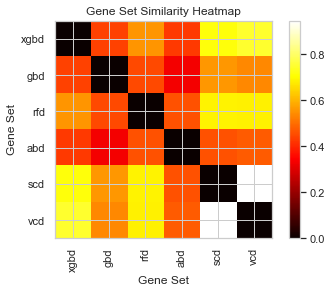

In [365]:
plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Gene Set Similarity Heatmap')
plt.xlabel('Gene Set')
plt.ylabel('Gene Set')

gene_sets_names = ["xgbd", "gbd", "rfd", "abd", "scd", "vcd"]

plt.xticks(range(num_sets), gene_sets_names, rotation = 90)
plt.yticks(range(num_sets),gene_sets_names)
plt.savefig("0726results/gene_stability.png")
plt.show()

### Pearson correlation

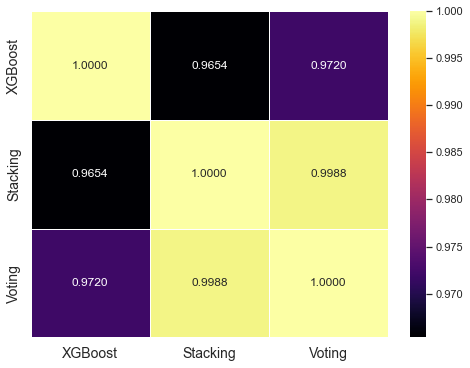

In [453]:
import numpy as np
from scipy.stats import spearmanr

xgbd = pd.read_csv("0726results/predictions_XGBClassifier.csv") 
scd = pd.read_csv("0726results/predictions_StackingClassifier.csv")
vcd = pd.read_csv("0726results/predictions_VotingClassifier.csv")

total_genes = np.array(xgbd["symbol"])

classifier1_gene_rank = np.array(xgbd["symbol"])
classifier2_gene_rank = np.array(scd["symbol"])
classifier3_gene_rank = np.array(vcd["symbol"])

# Create dictionaries to map gene names to their ranks
gene_to_rank1 = {gene: rank for rank, gene in enumerate(classifier1_gene_rank)}
gene_to_rank2 = {gene: rank for rank, gene in enumerate(classifier2_gene_rank)}
gene_to_rank3 = {gene: rank for rank, gene in enumerate(classifier3_gene_rank)}

# Create arrays of ranks for each gene based on the dictionaries
classifier1_ranks = pd.Series([gene_to_rank1[gene] for gene in total_genes], name='XGBoost')
classifier2_ranks = pd.Series([gene_to_rank2[gene] for gene in total_genes], name='Stacking')
classifier3_ranks = pd.Series([gene_to_rank3[gene] for gene in total_genes], name='Voting')

predictions_df = pd.concat([classifier1_ranks, classifier2_ranks, classifier3_ranks], axis=1)

# Calculate Pearson correlation matrix
correlation_matrix = predictions_df.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".4f", linewidths=0.5)
plt.savefig("0726results/pearson_correlation.png",dpi = 300)
plt.show()

In [367]:
xgbd["symbol"]

0           KCNJ4
1           ENPEP
2          SCN10A
3           KCNC1
4        CHRFAM7A
           ...   
18771      RBMY1F
18772     PRAMEF2
18773       DEFA4
18774    C1orf189
18775       NLRP9
Name: symbol, Length: 18776, dtype: object

In [368]:
import numpy as np
from scipy.stats import spearmanr

total_genes = np.array(xgbd["symbol"])

classifier1_gene_rank = np.array(xgbd["symbol"])
classifier2_gene_rank = np.array(scd["symbol"])
classifier3_gene_rank = np.array(scd["symbol"])

# Create dictionaries to map gene names to their ranks
gene_to_rank1 = {gene: rank for rank, gene in enumerate(classifier1_gene_rank)}
gene_to_rank2 = {gene: rank for rank, gene in enumerate(classifier2_gene_rank)}

# Create arrays of ranks for each gene based on the dictionaries
classifier1_ranks = np.array([gene_to_rank1[gene] for gene in total_genes])
classifier2_ranks = np.array([gene_to_rank2[gene] for gene in total_genes])

# Calculate the correlation between the ranked genes
correlation, p_value = spearmanr(classifier1_ranks, classifier2_ranks)
print("Spearman's Rank Correlation:", correlation)
print("P-value:", p_value)


Spearman's Rank Correlation: 0.9653570012531246
P-value: 0.0


In [23]:
stabs = []
for n in range(num_sets):
    stability = np.sum(similarity_matrix[n])
    # add the normalised stability i.e. how similar it is to other gene lists 
    stabs.append(stability/np.sum(similarity_matrix))

In [53]:
# use stabs as weight to generate a new PES? 
# xgbd, gbd, rfd, abd, scd, vcd 
weights = [1,1,1,1,1,1]
dataframes = [xgbd, gbd, rfd, abd, scd, vcd]

combined_df = pd.DataFrame()
sorted_xgbd = xgbd.sort_values('symbol',ascending=False)
combined_df['symbol'] = sorted_xgbd['symbol']
for i, df in enumerate(dataframes):
    weight = weights[i]
    name = "score_{}".format(i)
    sorted_df = df.sort_values('symbol', ascending=False)
    combined_df[name] = sorted_df['1'] * weight
    
    # combined_df = combined_df.append(df, ignore_index=True)

# Group by symbol and sum the weighted scores
#newdf = combined_df.groupby('symbol')['weighted_score'].sum().reset_index()
#newdf.sort_values(by=['weighted_score'],ascending=False, inplace=True)
newdf = pd.DataFrame()
newdf['symbol'] = combined_df["symbol"]
combined_df["score"] = combined_df[["score_0", "score_1", "score_2", 
                                   "score_3", "score_4","score_5"]].mean(axis = 1)

newdf["score"] = combined_df[["score_0", "score_1", "score_2", 
                                   "score_3", "score_4","score_5"]].mean(axis = 1)

newdf.sort_values(by=['score'],ascending=False, inplace=True)
display(combined_df[combined_df["symbol"] == "IRF1"])

,symbol,score_0,score_1,score_2,score_3,score_4,score_5,score
2,IRF1,1.078472,0.974002,0.989107,0.671297,0.957892,0.854604,0.920896


In [ ]:
# then validate the top 900 genes of the weighted_df.csv 